We see tons of different stores here and there through the web. Internet made it possible to trade with anyone and everywhere. We can buy goods without leaving our house, we can compare prices in different stores within seconds, we can find what we really want and do not accept just the first more or less suitable offer. And I believe it would be really interesting to look at this world through the data it produces. 

This is a transnational dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Most sales comes from UK and about 90% customers also are from UK, outside UK, most of the sales are from Europe. In my research I analyzed and studied this dataset and used time series analysis to build a model using ARIMA for the top products and total sales to find the best model that can help and guide the company future decisions.

## Libraries and Packeges

As always, we start our analysis by setting up our environment and by importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
import re
import plotly.express as px
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn import metrics
import time, warnings
import datetime as dt
import geopandas
from sklearn.metrics import average_precision_score
from scipy import stats
from matplotlib import pylab
from matplotlib import pyplot
from collections import defaultdict
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.cluster as cluster
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn import mixture
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
import pmdarima as pm

from math import ceil

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
import plotly
plotly.offline.init_notebook_mode(connected=True)

from ipywidgets import interact, interactive, fixed, interact_manual,VBox,HBox,Layout
import ipywidgets as widgets


sns.set()
warnings.filterwarnings("ignore")

/Users/AMINO/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/AMINO/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/Users/AMINO/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



In [2]:
pyplot.style.use('fivethirtyeight')

## Cleaning the Data & EDA

In [3]:
# Reading the dataset

Original_df = pd.read_excel (r'Online Retail.xlsx')
Original_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Checking the shape

Original_df.shape

(541909, 8)

In [5]:
# Checking my column IDs

Original_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
# How many unique values I have

Original_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [7]:
# Checking on the data type

Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Checking the data-types of the data

Original_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [9]:
# What are my countries 

Original_df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [10]:
# Checking the different values for country in the dataset

Original_df['Country'].value_counts().head(20)

United Kingdom     495478
Germany              9495
France               8557
EIRE                 8196
Spain                2533
Netherlands          2371
Belgium              2069
Switzerland          2002
Portugal             1519
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Sweden                462
Unspecified           446
Austria               401
Denmark               389
Japan                 358
Name: Country, dtype: int64

In [11]:
# Checking on the values 

Original_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
# Getting some more general information about the data

print("Number of transactions: ", Original_df['InvoiceNo'].nunique())
print("Number of products bought: ",Original_df['StockCode'].nunique())
print("Number of customers:", Original_df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(Original_df['CustomerID'].isnull().sum() * 100 / len(Original_df),2),"%" )
print('Number of countries: ',Original_df['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


In [13]:
# Checking how many quantity of products have been sold online from each country

Products_Sold = Original_df['Quantity'].groupby(Original_df['Country']).agg('sum').sort_values(ascending = False)
print(Products_Sold)

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


### Checking and dealing with null/missing values

In [14]:
# Checking for Missing Values

Original_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

As you can see CustomerID has a lot of null values and since we are doing sells prediction  this feature cannot help our prediction at this moment so we are just going to drop the CustomerID column

In [15]:
df = Original_df.drop(columns=['CustomerID'])

In [16]:
# Checking to see if NaN values were filtered out

df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

As you can see we still have null values left in the description so in our can instead deleting those rows we are going to impute them with 'UNKNOWN ITEM' at the moment 

In [17]:
df['Description'] = df['Description'].fillna('UNKNOWN ITEM')

In [18]:
# Checking to see if NaN values were filtered out

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [19]:
# WE still have 1 missing value and we are going to clear that out

df = df[df['Description'].notnull()]

In [20]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [21]:
# Lets make all the describtion upper case so it looks more clean

df['Description'] = df['Description'].str.upper()

In [22]:
# Lets check to make sure if it worked and see what customers bought often

df['Description'].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

In [23]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


### Exploring the negative Quantity and UnitePrice

In [24]:
df[df['Quantity'] < 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
141,C536379,D,DISCOUNT,-1,2010-12-01 09:41:00,27.50,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,United Kingdom


As you can see all the negative quantity starts with 'C' in InvoiceNo. The negative quantities appears to be return/canceled/discount, and maybe unknown items.

In [25]:
# For our analysis lets remove them for now

df = df[df['Quantity'] > 0]

In [26]:
df.describe()

,Quantity,UnitPrice
count,531285.000000,531285.000000
mean,10.655262,3.857296
std,156.830323,41.810047
min,1.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


As we can see we still have negative UnitPrice so let's filter out those as well

In [27]:
df = df[df['UnitPrice'] > 0]

In [28]:
df.describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


### Checking for duplicates

In [30]:
# Checking for duplicates

print("Number of duplicated transactions:", len(df[df.duplicated()]))

Number of duplicated transactions: 5226


In [31]:
# Lets remove the duplicates

df.drop_duplicates(inplace = True)

In [32]:
# Checking again for duplicates

print("Number of duplicated transactions:", len(df[df.duplicated()]))

Number of duplicated transactions: 0


In [33]:
df.shape

(524878, 7)

## Feature Engineering 

In [34]:
df.isnull().values.any()

False

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   Country      524878 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.0+ MB


### Creating total sales column and Removing outliers

In [36]:
# Creating a another new column with the total value of each order

df['Total_Sales_Amount'] = df['Quantity'] * df['UnitPrice']

In [37]:
# sorting the dataset by sales amount

df.sort_values(by = 'Total_Sales_Amount')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,United Kingdom,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,United Kingdom,0.001
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,United Kingdom,0.001
361741,568375,BANK CHARGES,BANK CHARGES,1,2011-09-26 17:01:00,0.001,United Kingdom,0.001
423991,573174,16218,CARTOON PENCIL SHARPENERS,1,2011-10-28 10:25:00,0.060,United Kingdom,0.060
...,...,...,...,...,...,...,...,...
299982,A563185,B,ADJUST BAD DEBT,1,2011-08-12 14:50:00,11062.060,United Kingdom,11062.060
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.330,United Kingdom,13541.330
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.500,United Kingdom,38970.000
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.040,United Kingdom,77183.600


Let's break down our InvoiceDate to year, month, hour, and other categories

In [38]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Year']=df.InvoiceDate.dt.year
df['Month']=df.InvoiceDate.dt.month
df['Week']=df['InvoiceDate'].dt.week
df['Year_Month']=df.InvoiceDate.dt.to_period('M')
df['Hour']=df.InvoiceDate.dt.hour
df['Day']=df.InvoiceDate.dt.day
df['WeekDay'] = df.InvoiceDate.dt.day_name()
df['Quarter'] = df.Month.apply(lambda m:'Q'+str(ceil(m/4)))
df['Date']=pd.to_datetime(df[['Year','Month','Day']])

In [39]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount,Year,Month,Week,Year_Month,Hour,Day,WeekDay,Quarter,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010,12,48,2010-12,8,1,Wednesday,Q3,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,48,2010-12,8,1,Wednesday,Q3,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010,12,48,2010-12,8,1,Wednesday,Q3,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,48,2010-12,8,1,Wednesday,Q3,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,48,2010-12,8,1,Wednesday,Q3,2010-12-01


In [40]:
df.dtypes

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
Country                       object
Total_Sales_Amount           float64
Year                           int64
Month                          int64
Week                           int64
Year_Month                 period[M]
Hour                           int64
Day                            int64
WeekDay                       object
Quarter                       object
Date                  datetime64[ns]
dtype: object

In [41]:
top_products = df['Description'].value_counts()[:15]

Looking for top products

In [42]:
top_products

WHITE HANGING HEART T-LIGHT HOLDER    2311
JUMBO BAG RED RETROSPOT               2109
REGENCY CAKESTAND 3 TIER              2007
PARTY BUNTING                         1699
LUNCH BAG RED RETROSPOT               1581
ASSORTED COLOUR BIRD ORNAMENT         1476
SET OF 3 CAKE TINS PANTRY DESIGN      1392
PACK OF 72 RETROSPOT CAKE CASES       1352
LUNCH BAG  BLACK SKULL.               1301
NATURAL SLATE HEART CHALKBOARD        1255
JUMBO BAG PINK POLKADOT               1232
HEART OF WICKER SMALL                 1219
JUMBO STORAGE BAG SUKI                1194
PAPER CHAIN KIT 50'S CHRISTMAS        1184
JUMBO SHOPPER VINTAGE RED PAISLEY     1180
Name: Description, dtype: int64

Analyzing and saving top products

In [43]:
dfp1 = df[df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER']

In [44]:
dfp1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount,Year,Month,Week,Year_Month,Hour,Day,WeekDay,Quarter,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.3,2010,12,48,2010-12,8,1,Wednesday,Q3,2010-12-01
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,United Kingdom,15.3,2010,12,48,2010-12,9,1,Wednesday,Q3,2010-12-01
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,United Kingdom,15.3,2010,12,48,2010-12,9,1,Wednesday,Q3,2010-12-01
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,United Kingdom,163.2,2010,12,48,2010-12,10,1,Wednesday,Q3,2010-12-01
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,United Kingdom,81.6,2010,12,48,2010-12,10,1,Wednesday,Q3,2010-12-01


In [45]:
dfp2 = df[df['Description'] == 'JUMBO BAG RED RETROSPOT']
dfp2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount,Year,Month,Week,Year_Month,Hour,Day,WeekDay,Quarter,Date
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 09:57:00,1.65,United Kingdom,165.00,2010,12,48,2010-12,9,1,Wednesday,Q3,2010-12-01
234,536390,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 10:19:00,1.65,United Kingdom,165.00,2010,12,48,2010-12,10,1,Wednesday,Q3,2010-12-01
533,536409,85099B,JUMBO BAG RED RETROSPOT,2,2010-12-01 11:45:00,1.95,United Kingdom,3.90,2010,12,48,2010-12,11,1,Wednesday,Q3,2010-12-01
790,536464,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-01 12:23:00,1.95,United Kingdom,1.95,2010,12,48,2010-12,12,1,Wednesday,Q3,2010-12-01
1069,536522,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-01 12:49:00,1.95,United Kingdom,1.95,2010,12,48,2010-12,12,1,Wednesday,Q3,2010-12-01


In [46]:
dfp3 = df[df['Description'] == 'REGENCY CAKESTAND 3 TIER']
dfp3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount,Year,Month,Week,Year_Month,Hour,Day,WeekDay,Quarter,Date
880,536477,22423,REGENCY CAKESTAND 3 TIER,16,2010-12-01 12:27:00,10.95,United Kingdom,175.20,2010,12,48,2010-12,12,1,Wednesday,Q3,2010-12-01
936,536502,22423,REGENCY CAKESTAND 3 TIER,2,2010-12-01 12:36:00,12.75,United Kingdom,25.50,2010,12,48,2010-12,12,1,Wednesday,Q3,2010-12-01
1092,536525,22423,REGENCY CAKESTAND 3 TIER,2,2010-12-01 12:54:00,12.75,United Kingdom,25.50,2010,12,48,2010-12,12,1,Wednesday,Q3,2010-12-01
1155,536528,22423,REGENCY CAKESTAND 3 TIER,1,2010-12-01 13:17:00,12.75,United Kingdom,12.75,2010,12,48,2010-12,13,1,Wednesday,Q3,2010-12-01
1197,536530,22423,REGENCY CAKESTAND 3 TIER,1,2010-12-01 13:21:00,12.75,United Kingdom,12.75,2010,12,48,2010-12,13,1,Wednesday,Q3,2010-12-01


In [47]:
dfp4 = df[df['Description'] == 'PARTY BUNTING']
dfp4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount,Year,Month,Week,Year_Month,Hour,Day,WeekDay,Quarter,Date
5535,536864,47566,PARTY BUNTING,1,2010-12-03 11:27:00,9.32,United Kingdom,9.32,2010,12,48,2010-12,11,3,Friday,Q3,2010-12-03
5656,536865,47566,PARTY BUNTING,3,2010-12-03 11:28:00,9.32,United Kingdom,27.96,2010,12,48,2010-12,11,3,Friday,Q3,2010-12-03
6022,536876,47566,PARTY BUNTING,2,2010-12-03 11:36:00,8.47,United Kingdom,16.94,2010,12,48,2010-12,11,3,Friday,Q3,2010-12-03
6572,536956,47566,PARTY BUNTING,5,2010-12-03 12:43:00,4.65,United Kingdom,23.25,2010,12,48,2010-12,12,3,Friday,Q3,2010-12-03
7904,537065,47566,PARTY BUNTING,5,2010-12-05 11:57:00,4.65,France,23.25,2010,12,48,2010-12,11,5,Sunday,Q3,2010-12-05


In [48]:
dfp5 = df[df['Description'] == 'LUNCH BAG RED RETROSPOT']
dfp5.head(0)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount,Year,Month,Week,Year_Month,Hour,Day,WeekDay,Quarter,Date


In [49]:
dfp6 = df[df['Description'] == 'ASSORTED COLOUR BIRD ORNAMENT']
dfp6.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount,Year,Month,Week,Year_Month,Hour,Day,WeekDay,Quarter,Date
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,United Kingdom,54.08,2010,12,48,2010-12,8,1,Wednesday,Q3,2010-12-01
250,536392,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-01 10:29:00,1.69,United Kingdom,27.04,2010,12,48,2010-12,10,1,Wednesday,Q3,2010-12-01
265,536395,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 10:47:00,1.69,United Kingdom,54.08,2010,12,48,2010-12,10,1,Wednesday,Q3,2010-12-01
458,536408,84879,ASSORTED COLOUR BIRD ORNAMENT,8,2010-12-01 11:41:00,1.69,United Kingdom,13.52,2010,12,48,2010-12,11,1,Wednesday,Q3,2010-12-01
769,536460,84879,ASSORTED COLOUR BIRD ORNAMENT,24,2010-12-01 12:22:00,1.69,United Kingdom,40.56,2010,12,48,2010-12,12,1,Wednesday,Q3,2010-12-01


In [50]:
dfp7 = df[df['Description'] == 'PACK OF 72 RETROSPOT CAKE CASES']
dfp7.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount,Year,Month,Week,Year_Month,Hour,Day,WeekDay,Quarter,Date
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,United Kingdom,50.4,2010,12,48,2010-12,9,1,Wednesday,Q3,2010-12-01
268,536395,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2010-12-01 10:47:00,0.55,United Kingdom,13.2,2010,12,48,2010-12,10,1,Wednesday,Q3,2010-12-01
408,536404,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2010-12-01 11:29:00,0.55,United Kingdom,13.2,2010,12,48,2010-12,11,1,Wednesday,Q3,2010-12-01
469,536408,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2010-12-01 11:41:00,0.55,United Kingdom,13.2,2010,12,48,2010-12,11,1,Wednesday,Q3,2010-12-01
657,536415,21212,PACK OF 72 RETROSPOT CAKE CASES,2,2010-12-01 11:57:00,0.55,United Kingdom,1.1,2010,12,48,2010-12,11,1,Wednesday,Q3,2010-12-01


In [51]:
dfp8 = df[df['Description'] == 'LUNCH BAG  BLACK SKULL.']
dfp8.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount,Year,Month,Week,Year_Month,Hour,Day,WeekDay,Quarter,Date
413,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,United Kingdom,16.50,2010,12,48,2010-12,11,1,Wednesday,Q3,2010-12-01
546,536412,20727,LUNCH BAG BLACK SKULL.,3,2010-12-01 11:49:00,1.65,United Kingdom,4.95,2010,12,48,2010-12,11,1,Wednesday,Q3,2010-12-01
1426,536542,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 14:11:00,1.65,United Kingdom,16.50,2010,12,48,2010-12,14,1,Wednesday,Q3,2010-12-01
2315,536576,20727,LUNCH BAG BLACK SKULL.,60,2010-12-01 16:11:00,1.45,United Kingdom,87.00,2010,12,48,2010-12,16,1,Wednesday,Q3,2010-12-01
2338,536579,20727,LUNCH BAG BLACK SKULL.,60,2010-12-01 16:16:00,1.45,United Kingdom,87.00,2010,12,48,2010-12,16,1,Wednesday,Q3,2010-12-01


In [52]:
dfp9 = df[df['Description'] == 'HEART OF WICKER SMALL']
dfp9.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount,Year,Month,Week,Year_Month,Hour,Day,WeekDay,Quarter,Date
160,536384,22469,HEART OF WICKER SMALL,40,2010-12-01 09:53:00,1.45,United Kingdom,58.00,2010,12,48,2010-12,9,1,Wednesday,Q3,2010-12-01
195,536388,22469,HEART OF WICKER SMALL,12,2010-12-01 09:59:00,1.65,United Kingdom,19.80,2010,12,48,2010-12,9,1,Wednesday,Q3,2010-12-01
392,536404,22469,HEART OF WICKER SMALL,12,2010-12-01 11:29:00,1.65,United Kingdom,19.80,2010,12,48,2010-12,11,1,Wednesday,Q3,2010-12-01
634,536415,22469,HEART OF WICKER SMALL,5,2010-12-01 11:57:00,1.65,United Kingdom,8.25,2010,12,48,2010-12,11,1,Wednesday,Q3,2010-12-01
995,536520,22469,HEART OF WICKER SMALL,1,2010-12-01 12:43:00,1.65,United Kingdom,1.65,2010,12,48,2010-12,12,1,Wednesday,Q3,2010-12-01


In [53]:
dfp10 = df[df['Description'] == 'JUMBO SHOPPER VINTAGE RED PAISLEY']
dfp10.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount,Year,Month,Week,Year_Month,Hour,Day,WeekDay,Quarter,Date
108,536381,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2010-12-01 09:41:00,1.95,United Kingdom,19.50,2010,12,48,2010-12,9,1,Wednesday,Q3,2010-12-01
145,536382,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2010-12-01 09:45:00,1.95,United Kingdom,19.50,2010,12,48,2010-12,9,1,Wednesday,Q3,2010-12-01
881,536477,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2010-12-01 12:27:00,1.95,United Kingdom,19.50,2010,12,48,2010-12,12,1,Wednesday,Q3,2010-12-01
1107,536526,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2010-12-01 12:58:00,1.95,United Kingdom,19.50,2010,12,48,2010-12,12,1,Wednesday,Q3,2010-12-01
1136,536528,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,1,2010-12-01 13:17:00,1.95,United Kingdom,1.95,2010,12,48,2010-12,13,1,Wednesday,Q3,2010-12-01


# Modeling

I was recently tasked with creating a weekly, and daily sales forecast. For my research, I will be doing time series analysis using ARIMA model to forecast

An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends.

The first step in the model-building process is to plot the series and look for any evidence that the mean or variance is not stationary. (The ARIMA procedure assumes that the original series is stationary.)

## Weekly Sales

In [54]:
ds_weekly = df.groupby(by=['Year','Week'])['Total_Sales_Amount'].sum().reset_index()

In [55]:
ds_weekly.head()

,Year,Week,Total_Sales_Amount
0,2010,48,184669.47
1,2010,49,329108.22
2,2010,50,215357.04
3,2010,51,92318.00
4,2011,1,133429.72


In [56]:
roll_mean = ds_weekly.rolling(window=3, center=False).mean()
roll_std = ds_weekly.rolling(window=3, center=False).std()

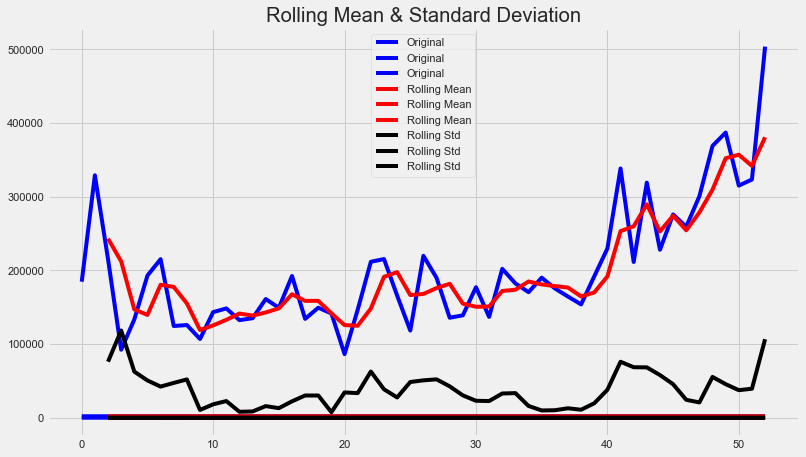

In [57]:
fig = plt.figure(figsize=(12,7))
plt.plot(ds_weekly, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### Weekly Sales: Weekly Trend

In [58]:
fig = go.Figure(data=[go.Scatter(x=ds_weekly.index,y=ds_weekly.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Week",yaxis_title="Total Sales Amount",title='Weekly Sales Trend',height=400,template='ggplot2')
fig.show()

As we can see in the graph above, the weekly trend looks like a Exponential trend.

A typical example could be a company's sales. Initially, when small companies start to grow, there sales could be slower; but when their product catches people's attention, the sales can start to grow exponentially.

### Weekly Sales: Test of Stationarity of Actual Series

It is clear that the level of the series is not stationary. Some degree of differencing will be necessary to stabilize the series level

In [59]:
output = adfuller(ds_weekly.Total_Sales_Amount)
print('***************************Week*********************************')
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is extreemly high which indicates that we are fail to reject null hypothesis " \
      "and can conclude that series is not stationary ")



***************************Week*********************************
ADF Statistic: 1.59 and P value:0.99784
As we can see the p value is extreemly high which indicates that we are fail to reject null hypothesis and can conclude that series is not stationary 


### Weekly Sales: Test of Stationarity with 1 differencing of series

Test of Stationarity with 1 differencing of series. 

Differencing is a method of transforming a non-stationary time series into a stationary one. This is an important step in preparing data to be used in an ARIMA model.

In [60]:
d=1
print('***************************Week*********************************')
series = ds_weekly.Total_Sales_Amount.diff(d)
series = series.dropna()
output = adfuller(series)

print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Week*********************************
ADF Statistic: -7.39 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Weekly Sales: ACF & PACF

Autocorrelation refers to how correlated a time series is with its past values whereas the ACF is the plot used to see the correlation between the points, up to and including the lag unit. In ACF, the correlation coefficient is in the x-axis whereas the number of lags is shown in the y-axis.


After plotting the ACF plot we move to Partial Autocorrelation Function plots (PACF). A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

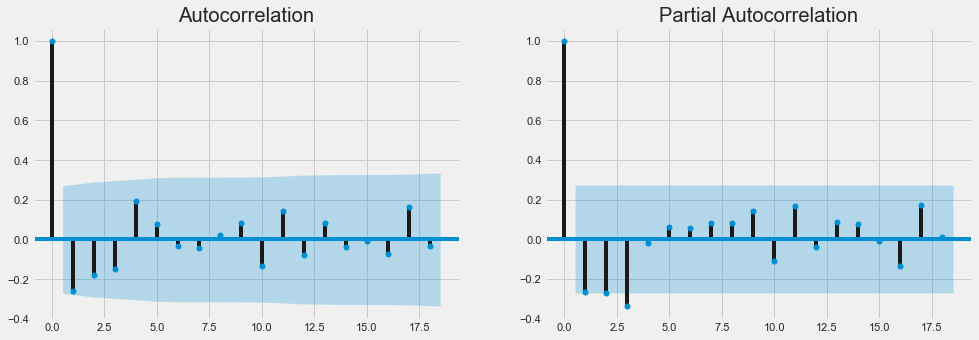

In [61]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series, ax=ax[0])
plot_pacf(series, ax=ax[1])
plt.show()

One lag can be found above the significance level and thus q = 1. 
The first lag is the only one vastly above the signicance level and so p = 1.

The autocorrelation function can tell the order of MA terms, q, needed to remove autocorrelation in the stationary series.

### Weekly Sales: Train & Test Split

Let's validate how accurate our model is. I am going to use the test train validation split to achieve this

In [62]:
series=ds_weekly.Total_Sales_Amount
split_time = 45
time=np.arange(len(ds_weekly))
xtrain=series[:split_time]
xtest=series[split_time:]
timeTrain = time[:split_time]
timeTest = time[split_time:]

### Weekly Sales: ARIMA Model

Fitting the ARIMA model using above optimal combination of p, d, q

In [63]:
model = ARIMA(xtrain, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                   44
Model:                   ARIMA(1, 1, 0)   Log Likelihood                -543.940
Method:                         css-mle   S.D. of innovations          56476.313
Date:                  Mon, 04 Jan 2021   AIC                           1093.881
Time:                          04:41:54   BIC                           1099.233
Sample:                               1   HQIC                          1095.866
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        653.5832   6212.436      0.105      0.917   -1.15e+04    1.28e+04
ar.L1.D.Total_Sales_Amount    -0.3793      0.153     -2.478      0.

### Weekly Sales: Weekly Sales Trend and Forecast

Now we have all we need to fit and plot the model

RMSE Train : 182578.3533437104
RMSE Test : 346578.0272511122


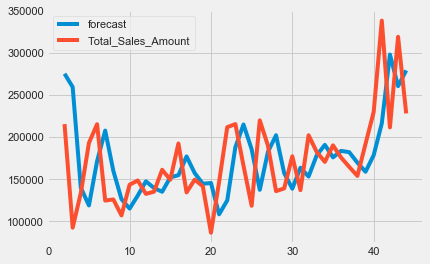

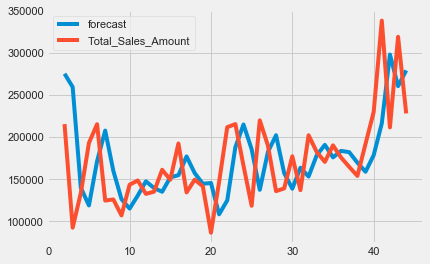

In [64]:
ytrain_pred = model_fit.predict()
ytest_pred = model_fit.predict(start=min(timeTest),end=max(timeTest),dynamic=True)
print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest)**2)))
forecast = model_fit.forecast(20, alpha=0.05)
model_fit.plot_predict()

In [65]:
model_fit.forecast(30)[0]

array([263473.39251312, 250933.71479928, 256591.56553247, 255347.00589351,
       256720.56382389, 257101.05712361, 257858.22463086, 258472.51779314,
       259141.00388407, 259788.93433559, 260444.66164035, 261097.43156105,
       261751.32323179, 262404.78941733, 263058.41699146, 263711.98335012,
       264365.5729281 , 265019.15369888, 265672.73781028, 266326.32065456,
       266979.90397947, 267633.48712207, 268287.07033382, 268940.65351935,
       269594.23671482, 270247.81990652, 270901.40309965, 271554.98629223,
       272208.56948503, 272862.15267774])

The above plot shows that our predicted values catch up to the observed values in the dataset.
As we forecast further out into the future, it is natural for us to become less confident in our values.

## Daily Sales

Now let's build a ARIMA model and forecast our Daily Sales. I will be doing the same steps as I did for the Weekly Sales model, lets see if our results would be any different.


As usual he first step in the model-building process is to plot the series and look for any evidence that the mean or variance is not stationary.

In [66]:
ds_daily = df.groupby(by=['Date'])['Total_Sales_Amount'].sum().reset_index()

In [67]:
ds_daily.head()

,Date,Total_Sales_Amount
0,2010-12-01,58776.79
1,2010-12-02,47629.42
2,2010-12-03,46898.63
3,2010-12-05,31364.63
4,2010-12-06,54624.15


In [68]:
roll_mean = ds_daily.rolling(window=8, center=False).mean()
roll_std = ds_daily.rolling(window=8, center=False).std()

In [69]:
#fig = plt.figure(figsize=(12,7))
#plt.plot(ds_daily, color='blue', label='Original')
#plt.plot(roll_mean, color='red', label='Rolling Mean')
#plt.plot(roll_std, color='black', label = 'Rolling Std')
#plt.legend(loc='best')
#plt.title('Rolling Mean & Standard Deviation')
#plt.show

### Daily Sales: Daily Trend 

In [70]:
fig = go.Figure(data=[go.Scatter(x=ds_daily.Date,y=ds_daily.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Date",yaxis_title="Total_Sales_Amount",title='Daily Trend',height=400,template='ggplot2')
fig.show()

Based on the graph we can see a slightly upward trend in our daily sales and because it is upward trend it is not stationarity. 

### Daily Sales: Test of Stationarity of Actual Series

To make sure let's do the stationarity test

In [71]:
print('\n***************************Daily*********************************')
output = adfuller(ds_daily.Total_Sales_Amount)
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is extreemly high which indicates that we are fail to reject null hypothesis " \
      "and can conclude that series is not stationary ")


***************************Daily*********************************
ADF Statistic: 0.03 and P value:0.96093
As we can see the p value is extreemly high which indicates that we are fail to reject null hypothesis and can conclude that series is not stationary 


### Daily Sales: Test of Stationarity with 1 differencing of series

As I mentioned before to proceed with our time series analysis, we need to stationarize the dataset. There are many approaches to stationarize data, but we’ll use differencing.

In [72]:
print('\n***************************Daily*********************************')
series_date = ds_daily.Total_Sales_Amount.diff(d)
series_date = series_date.dropna()
output = adfuller(series_date)
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Daily*********************************
ADF Statistic: -6.38 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Daily Sales: ACF & PACF

Let's do a visual inspection of ACF and PACF

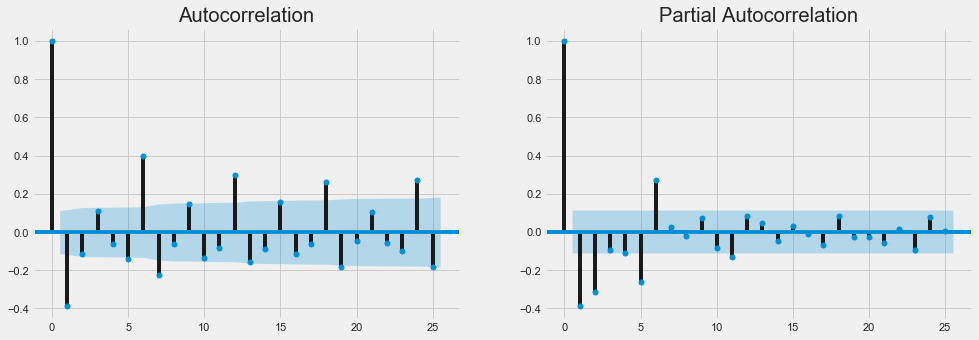

In [73]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_date, ax=ax[0])
plot_pacf(series_date, ax=ax[1])
plt.show()

### Daily Sales: Train & Test Split

Again let's validate how accurate our model is, we are going to use the test train validation split to achieve this

In [74]:
series_date=ds_daily.Total_Sales_Amount
split_time = 244
time_d=np.arange(len(ds_daily))
xtrain_d=series_date[:split_time]
xtest_d=series_date[split_time:]
timeTrain_d = time_d[:split_time]
timeTest_d = time_d[split_time:]

### Daily Sales: ARIMA Model

Fitting the ARIMA model using above optimal combination of p, d, q

In [75]:
s_model = ARIMA(endog=xtrain_d , order=(1, 1, 0))
s_model_fit=s_model.fit()
print(s_model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                  243
Model:                   ARIMA(1, 1, 0)   Log Likelihood               -2734.702
Method:                         css-mle   S.D. of innovations          18669.617
Date:                  Mon, 04 Jan 2021   AIC                           5475.405
Time:                          04:41:55   BIC                           5485.884
Sample:                               1   HQIC                          5479.626
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -51.1664    866.371     -0.059      0.953   -1749.223    1646.890
ar.L1.D.Total_Sales_Amount    -0.3840      0.059     -6.500      0.

### Daily Sales: Daily Sales Trend & Forecast 

Lastly let's fit and plot the model

RMSE Train : 35106.516413391924
RMSE Test : 60999.69388072438


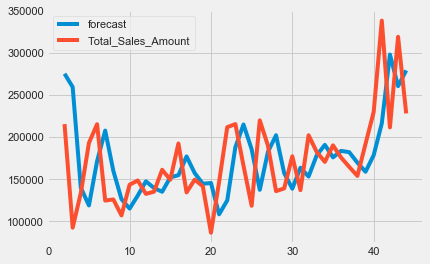

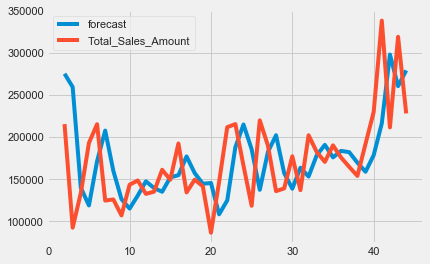

In [76]:
ytrain_pred = s_model_fit.predict()
ytest_pred = s_model_fit.predict(start=min(timeTest_d),end=max(timeTest_d),dynamic=True)

print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain_d)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest_d)**2)))
forecast = s_model_fit.forecast(20, alpha=0.05)
model_fit.plot_predict()

In [77]:
model_fit.forecast(30)[0]

array([263473.39251312, 250933.71479928, 256591.56553247, 255347.00589351,
       256720.56382389, 257101.05712361, 257858.22463086, 258472.51779314,
       259141.00388407, 259788.93433559, 260444.66164035, 261097.43156105,
       261751.32323179, 262404.78941733, 263058.41699146, 263711.98335012,
       264365.5729281 , 265019.15369888, 265672.73781028, 266326.32065456,
       266979.90397947, 267633.48712207, 268287.07033382, 268940.65351935,
       269594.23671482, 270247.81990652, 270901.40309965, 271554.98629223,
       272208.56948503, 272862.15267774])

As we see overall, the forecasts align with the true values very closely showing an upward trend in daily sales.

# Products Models

Now we are going to do a time series analysis and forecast weekly and daily for the top 10 products in our dataset.

Again, I will be using ARIMA statistical model for my time series analysis, the steps are going to be similar to my previous models. Please check the previous models description for any clarifications or questions. Also, I will be removing the 'Test of Stationarity' step because usually product sales are not stationary due to the fact of inconstancy in sales. It has a variable variance and a mean that does not remain near, or returns to a long-run mean over time.

## Product #1: 'White Hanging Heart T-Light Holder'

In [78]:
ds_weekly_P1 = dfp1.groupby(by=['Year','Week'])['Total_Sales_Amount'].sum().reset_index()

### Product #1: Total Sales Weekly Trend

In [79]:
fig = go.Figure(data=[go.Scatter(x=ds_weekly_P1.index,y=ds_weekly_P1.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Week",yaxis_title="Total Sales Amount",title='Product #1: Weekly Trend',height=400,template='ggplot2')
fig.show()

It is clear that the level of the series is not stationary. Some degree of differencing will be necessary to stabilize the series level


### Product #1: Test of Stationarity with 1 differencing of series

In [80]:
d=1
print('***************************Week*********************************')
series_1 = ds_weekly_P1.Total_Sales_Amount.diff(d)
series_1 = series_1.dropna()
output = adfuller(series_1)

print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))


***************************Week*********************************
ADF Statistic: -9.67 and P value:0.00000


### Product #1: PACF & ACF

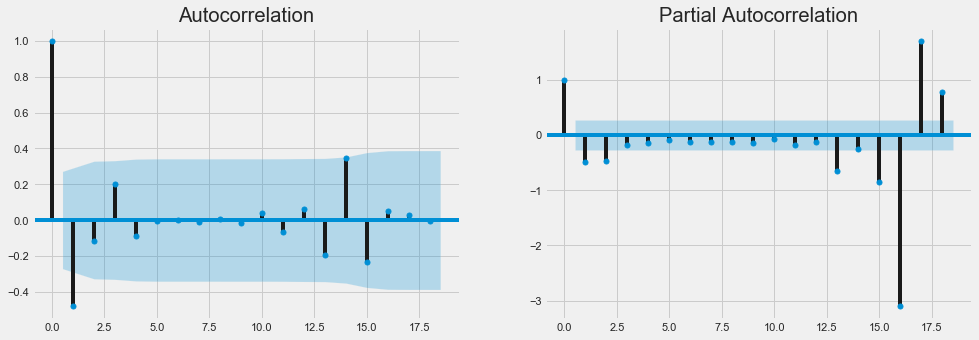

In [81]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_1, ax=ax[0])
plot_pacf(series_1, ax=ax[1])
plt.show()

### Product #1: Train & Test Split

In [82]:
series_1=ds_weekly_P1.Total_Sales_Amount
split_time = 42
time=np.arange(len(ds_weekly_P1))
xtrain=series_1[:split_time]
xtest=series_1[split_time:]
timeTrain = time[:split_time]
timeTest = time[split_time:]
print('Full Set Size ',series_1.shape)
print('Training Set Size ',xtrain.shape)
print('Testing Set Size ',xtest.shape)

Full Set Size  (53,)
Training Set Size  (42,)
Testing Set Size  (11,)


### Product #1: ARIMA Model

In [83]:
model = ARIMA(xtrain, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                   41
Model:                   ARIMA(1, 1, 0)   Log Likelihood                -368.122
Method:                         css-mle   S.D. of innovations           1914.027
Date:                  Mon, 04 Jan 2021   AIC                            742.244
Time:                          04:41:57   BIC                            747.385
Sample:                               1   HQIC                           744.116
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -25.2606    208.499     -0.121      0.904    -433.911     383.389
ar.L1.D.Total_Sales_Amount    -0.4446      0.137     -3.247      0.

### Product #1: Weekly Sales Trend and Forecast

RMSE Train : 2727.898344042451
RMSE Test : 2468.4484704964975


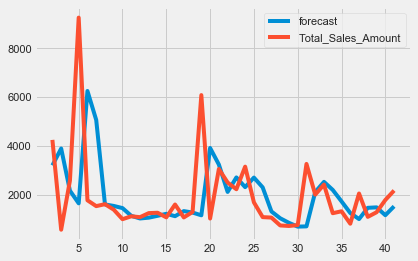

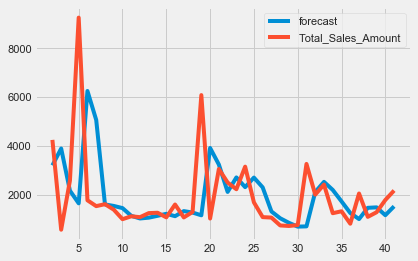

In [84]:
ytrain_pred = model_fit.predict()
ytest_pred = model_fit.predict(start=min(timeTest),end=max(timeTest),dynamic=True)
print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest)**2)))

forecast = model_fit.forecast(20, alpha=0.05)
model_fit.plot_predict()

In [85]:
model_fit.forecast(30)[0]

array([1966.55314582, 2022.85643603, 1961.33080989, 1952.19432365,
       1919.76455708, 1897.69145812, 1871.01357347, 1846.38307048,
       1820.84225983, 1795.70619054, 1770.39016498, 1745.15415165,
       1719.88256325, 1694.62679225, 1669.36398852, 1644.10431168,
       1618.84324456, 1593.58279559, 1568.32207177, 1543.06147016,
       1517.80081422, 1492.54018243, 1467.2795399 , 1442.01890214,
       1416.75826227, 1391.49762333, 1366.23698398, 1340.97634481,
       1315.71570557, 1290.45506635])

From the chart, the ARIMA(1,1,0) model seems to give a directionally correct forecast. Also based on the forecast this product has a downward trend.

### Product #1 Daily: Daily Trend

In [86]:
ds_daily_P1 = dfp1.groupby(by=['Date'])['Total_Sales_Amount'].sum().reset_index()

In [87]:
fig = go.Figure(data=[go.Scatter(x=ds_daily_P1.Date,y=ds_daily_P1.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Date",yaxis_title="Total Sales Amount",title='Product #1: Daily Trend',height=400,template='ggplot2')
fig.show()

### Product #1 Daily: Test of Stationarity with 1 differencing of series

In [88]:
print('\n***************************Daily*********************************')
series_date_1 = ds_daily_P1.Total_Sales_Amount.diff(d)
series_date_1 = series_date_1.dropna()
output = adfuller(series_date_1)
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))


***************************Daily*********************************
ADF Statistic: -9.22 and P value:0.00000


### Product #1 Daily: PACF & ACF

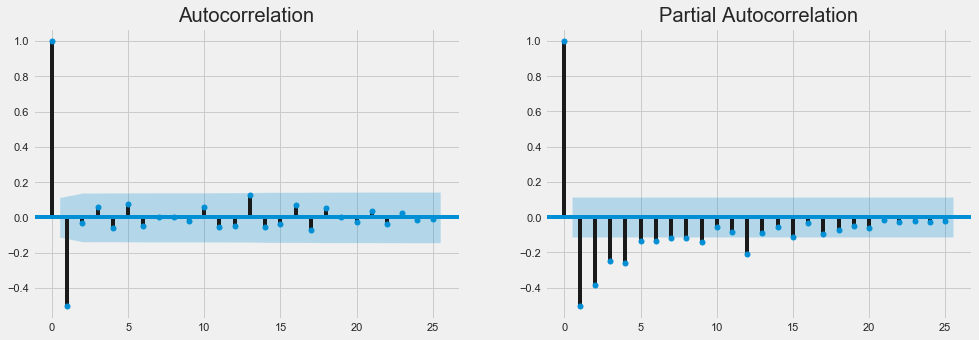

In [89]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_date_1, ax=ax[0])
plot_pacf(series_date_1, ax=ax[1])
plt.show()

### Product #1 Daily: Train & Test Split

In [90]:
series_date_1=ds_daily_P1.Total_Sales_Amount
split_time = 250
time_d=np.arange(len(ds_daily_P1))
xtrain_d=series_date_1[:split_time]
xtest_d=series_date_1[split_time:]
timeTrain_d = time_d[:split_time]
timeTest_d = time_d[split_time:]

### Product #1 Daily: ARIMA Model

In [91]:
s_model = ARIMA(endog=xtrain_d , order=(1, 1, 0))
s_model_fit=s_model.fit()
print(s_model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                  249
Model:                   ARIMA(1, 1, 0)   Log Likelihood               -2032.436
Method:                         css-mle   S.D. of innovations            847.989
Date:                  Mon, 04 Jan 2021   AIC                           4070.872
Time:                          04:41:58   BIC                           4081.425
Sample:                               1   HQIC                          4075.120
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -4.0456     35.778     -0.113      0.910     -74.170      66.079
ar.L1.D.Total_Sales_Amount    -0.5040      0.055     -9.247      0.

### Product #1 Daily: Daily Sales Trend and Forecast

RMSE Train : 906.9327276856891
RMSE Test : 689.0375819990196


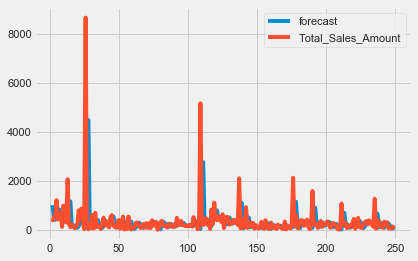

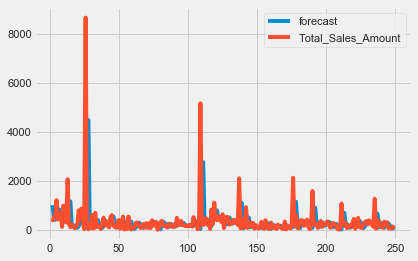

In [92]:
ytrain_pred = s_model_fit.predict()
ytest_pred = s_model_fit.predict(start=min(timeTest_d),end=max(timeTest_d),dynamic=True)

print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain_d)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest_d)**2)))
forecast = s_model_fit.forecast(20, alpha=0.05)
s_model_fit.plot_predict()

In [93]:
s_model_fit.forecast(30)[0]

array([ 85.71465972,  57.18843141,  65.48177581,  55.21708524,
        54.30613337,  48.68065069,  45.43141578,  40.98448937,
        37.14123104,  32.99370809,  28.99954252,  24.9280808 ,
        20.89557837,  16.84343943,  12.80119781,   8.75396768,
         4.7092519 ,   0.66326881,  -3.38207552,  -7.4277418 ,
       -11.47324581, -15.51883161, -19.56437618, -23.60994153,
       -27.65549641, -31.70105657, -35.74661407, -39.79217291,
       -43.83773107, -47.88328957])

From the chart, the ARIMA(1,1,0) model seems to give a directionally correct forecast. Also, based on forecasts we slight downward trend.

## Product #2: 'Jumbo Bag Red Retrospot'

In [94]:
ds_weekly_P2 = dfp2.groupby(by=['Date'])['Total_Sales_Amount'].sum().reset_index()

### Product #2 Weekly: Weekly Trend

In [95]:
fig = go.Figure(data=[go.Scatter(x=ds_weekly_P2.index,y=ds_weekly_P2.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Week",yaxis_title="Total Sales Amount",title='Product #2: Weekly Trend',height=400,template='ggplot2')
fig.show()

### Product #2 Weekly: Test of Stationarity with 1 differencing of series

In [96]:
d=1
print('***************************Week*********************************')
series_2 = ds_weekly_P2.Total_Sales_Amount.diff(d)
series_2 = series_2.dropna()
output = adfuller(series_2)

print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Week*********************************
ADF Statistic: -10.87 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #2 Weekly: PACF & ACF

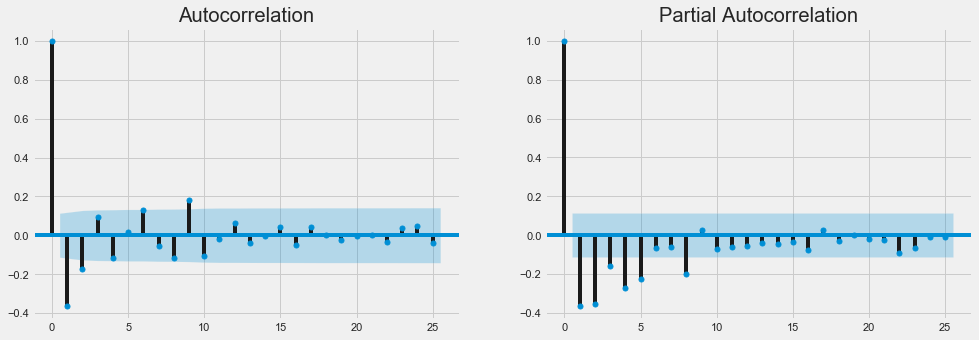

In [97]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_2, ax=ax[0])
plot_pacf(series_2, ax=ax[1])
plt.show()

### Product #2 Weekly: Train & Test Split

In [98]:
series_2=ds_weekly_P2.Total_Sales_Amount
split_time = 50
time=np.arange(len(ds_weekly))
xtrain=series_2[:split_time]
xtest=series_2[split_time:]
timeTrain = time[:split_time]
timeTest = time[split_time:]

### Product #2 Weekly: ARIMA Model

In [99]:
model = ARIMA(xtrain, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                   49
Model:                   ARIMA(1, 1, 0)   Log Likelihood                -345.965
Method:                         css-mle   S.D. of innovations            281.596
Date:                  Mon, 04 Jan 2021   AIC                            697.929
Time:                          04:41:59   BIC                            703.605
Sample:                               1   HQIC                           700.083
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -12.4033     30.709     -0.404      0.688     -72.593      47.786
ar.L1.D.Total_Sales_Amount    -0.3185      0.148     -2.159      0.

### Product #2 Weekly: Weekly Trend and Forecast 

RMSE Train : 341.3040033477939
RMSE Test : 420.1330541319082


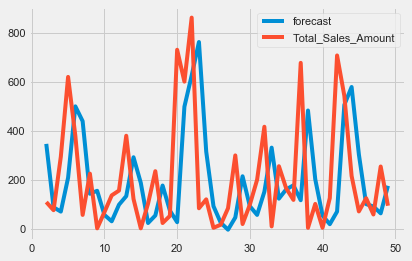

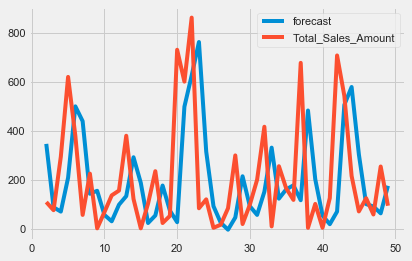

In [100]:
ytrain_pred = model_fit.predict()
ytest_pred = model_fit.predict(start=min(timeTest),end=max(timeTest),dynamic=True)
print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest)**2)))
forecast = model_fit.forecast(20, alpha=0.05)
model_fit.plot_predict()

In [101]:
model_fit.forecast(30)[0]

array([ 128.7728193 ,  101.40046532,   93.76506546,   79.84311241,
         67.92353271,   55.36616328,   43.01194066,   30.59301234,
         18.19469389,    5.78981084,   -6.61298127,  -19.01643938,
        -31.41968536,  -43.82299891,  -56.22629094,  -68.62958982,
        -81.03288651,  -93.43618391, -105.83948108, -118.24277832,
       -130.64607554, -143.04937276, -155.45266999, -167.85596721,
       -180.25926444, -192.66256166, -205.06585889, -217.46915611,
       -229.87245333, -242.27575056])

Our Forecast also shows a downward trend for this product

### Product #2 Daily: Daily Trend

In [102]:
ds_daily_P2 = dfp2.groupby(by=['Date'])['Total_Sales_Amount'].sum().reset_index()

In [103]:
fig = go.Figure(data=[go.Scatter(x=ds_daily_P2.Date,y=ds_daily_P2.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Date",yaxis_title="Total Sales Amount",title='Product #2: Daily Trend',height=400,template='ggplot2')
fig.show()

### Product #2 Daily: Test of Stationarity with 1 differencing of series

In [104]:
print('\n***************************Daily*********************************')
series_date_2 = ds_daily_P2.Total_Sales_Amount.diff(d)
series_date_2 = series_date_2.dropna()
output = adfuller(series_date_2)
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))


***************************Daily*********************************
ADF Statistic: -10.87 and P value:0.00000


### Product #2 Daily: PACF & ACF

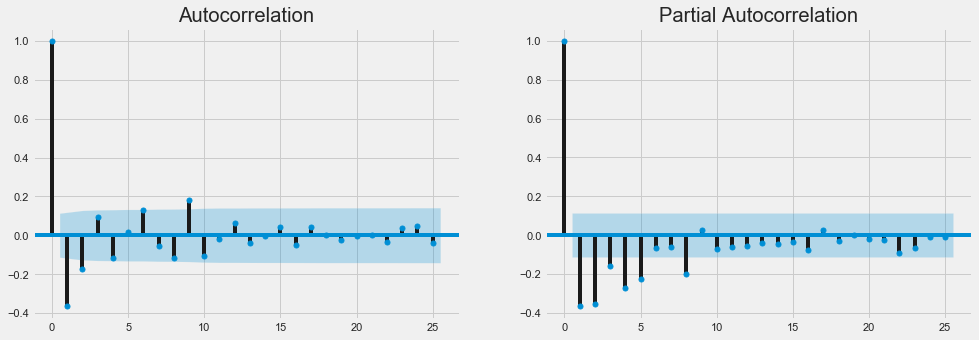

In [105]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_date_2, ax=ax[0])
plot_pacf(series_date_2, ax=ax[1])
plt.show()

### Product #2 Daily: Train & Test Split

In [106]:
series_date_2=ds_daily_P2.Total_Sales_Amount
split_time = 245
time_d=np.arange(len(ds_daily_P2))
xtrain_d=series_date_2[:split_time]
xtest_d=series_date_2[split_time:]
timeTrain_d = time_d[:split_time]
timeTest_d = time_d[split_time:]

### Product #2 Daily:  ARIMA Model

In [107]:
s_model = ARIMA(endog=xtrain_d , order=(1, 1, 0))
s_model_fit=s_model.fit()
print(s_model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                  244
Model:                   ARIMA(1, 1, 0)   Log Likelihood               -1798.230
Method:                         css-mle   S.D. of innovations            383.926
Date:                  Mon, 04 Jan 2021   AIC                           3602.459
Time:                          04:42:01   BIC                           3612.951
Sample:                               1   HQIC                          3606.685
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          6.3895     17.287      0.370      0.712     -27.493      40.272
ar.L1.D.Total_Sales_Amount    -0.4236      0.063     -6.723      0.

### Product #2 Daily: Daily Trend and Forecast

RMSE Train : 482.696861284742
RMSE Test : 572.2031613279908


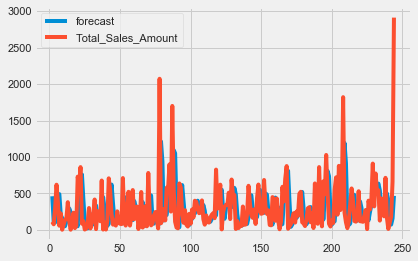

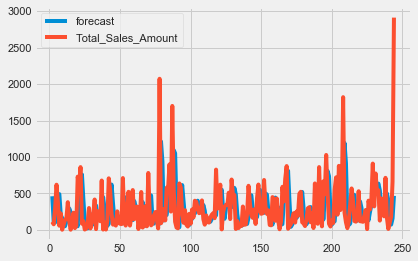

In [108]:
ytrain_pred = s_model_fit.predict()
ytest_pred = s_model_fit.predict(start=min(timeTest_d),end=max(timeTest_d),dynamic=True)

print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain_d)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest_d)**2)))
forecast = s_model_fit.forecast(20, alpha=0.05)
s_model_fit.plot_predict()

In [109]:
s_model_fit.forecast(30)[0]

array([1968.30306627, 2377.62185276, 2213.34387605, 2292.02252096,
       2267.79277485, 2287.15162029, 2288.0477797 , 2296.7641224 ,
       2302.16809405, 2308.97507654, 2315.18779004, 2321.65221623,
       2328.01002525, 2334.41299378, 2340.79683423, 2347.18877671,
       2353.57728743, 2359.96725173, 2366.35660035, 2372.74620975,
       2379.13570869, 2385.52525441, 2391.91478032, 2398.30431462,
       2404.69384537, 2411.08337762, 2417.47290924, 2423.86244112,
       2430.25197289, 2436.64150471])

Based on the forecast we can see an upward trend in this product

## Product #3: 'Regency Cakestand 3 Tier'

In [110]:
ds_weekly_P3 = dfp3.groupby(by=['Year','Week'])['Total_Sales_Amount'].sum().reset_index()

### Product #3 Weekly: Total Sales Weekly Trend

In [111]:
fig = go.Figure(data=[go.Scatter(x=ds_weekly_P3.index,y=ds_weekly_P3.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Week",yaxis_title="Total Sales Amount",title='Product #3: Weekly Trend',height=400,template='ggplot2')
fig.show()

### Product #3 Weekly: Test of Stationarity with 1 differencing of series

In [112]:
d=1
print('***************************Week*********************************')
series_3 = ds_weekly_P3.Total_Sales_Amount.diff(d)
series_3 = series_3.dropna()
output = adfuller(series_3)

print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis ")

***************************Week*********************************
ADF Statistic: -11.38 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis 


### Product #3 Weekly: PACF & ACF

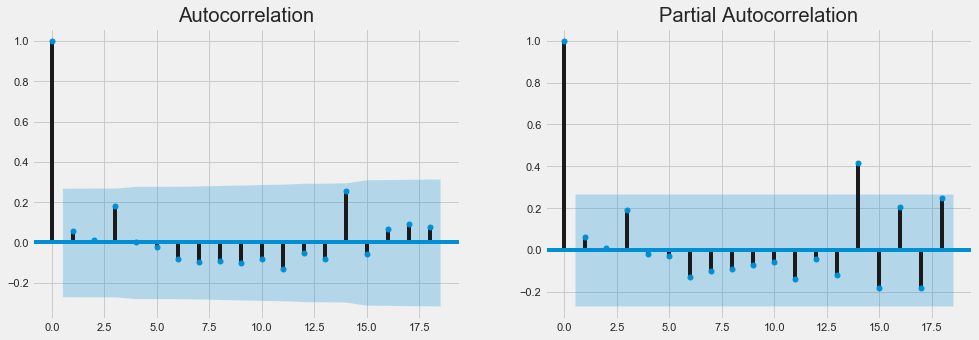

In [113]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_1, ax=ax[0])
plot_pacf(series_1, ax=ax[1])
plt.show()

### Product #3 Weekly: Train & Test Split

In [114]:
series_3=ds_weekly_P3.Total_Sales_Amount
split_time = 45
time=np.arange(len(ds_weekly_P1))
xtrain=series_3[:split_time]
xtest=series_3[split_time:]
timeTrain = time[:split_time]
timeTest = time[split_time:]

### Product #3 Weekly: ARIMA Model

In [115]:
model = ARIMA(xtrain, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                   44
Model:                   ARIMA(1, 1, 0)   Log Likelihood                -383.705
Method:                         css-mle   S.D. of innovations           1479.269
Date:                  Mon, 04 Jan 2021   AIC                            773.410
Time:                          04:42:02   BIC                            778.763
Sample:                               1   HQIC                           775.395
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -122.0914    157.018     -0.778      0.441    -429.841     185.658
ar.L1.D.Total_Sales_Amount    -0.4302      0.144     -2.977      0.

### Product #3 Weekly: Weekly Trend and Forecast

RMSE Train : 3427.851159725249
RMSE Test : 3324.0270936553843


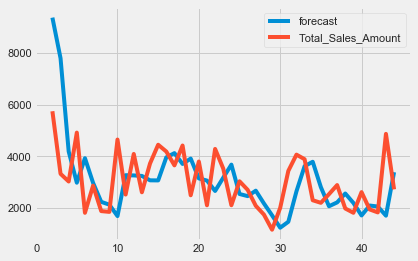

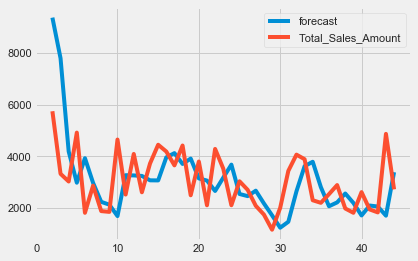

In [116]:
ytrain_pred = model_fit.predict()
ytest_pred = model_fit.predict(start=min(timeTest),end=max(timeTest),dynamic=True)
print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest)**2)))
forecast = model_fit.forecast(20, alpha=0.05)
model_fit.plot_predict()

In [117]:
model_fit.forecast(30)[0]

array([3475.94970187, 2980.08109092, 3018.7931479 , 2827.52220267,
       2735.19269786, 2600.29740106, 2483.71441749, 2359.25325757,
       2238.18138341, 2115.65139795, 1993.74870942, 1871.57615025,
       1749.51969266, 1627.41328678, 1505.32836925, 1383.23420717,
       1261.14402221, 1139.05212624, 1016.96096637,  894.86948983,
        772.77814952,  650.6867506 ,  528.59537689,  406.50399234,
        284.41261245,  162.32123056,   40.22984953,  -81.86153187,
       -203.95291311, -326.04429442])

Based on our forecast model the product has downward weekly trend

### Product #3 Daily: Daily Trend

In [118]:
ds_daily_P3 = dfp3.groupby(by=['Date'])['Total_Sales_Amount'].sum().reset_index()

In [119]:
fig = go.Figure(data=[go.Scatter(x=ds_daily_P3.Date,y=ds_daily_P3.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Date",yaxis_title="Total Sales Amount",title='Product #3: Daily Trend',height=400,template='ggplot2')
fig.show()

### Product #3 Daily: Test of Stationarity with 1 differencing of series

In [120]:
print('\n***************************Daily*********************************')
series_date_3 = ds_daily_P3.Total_Sales_Amount.diff(d)
series_date_3 = series_date_3.dropna()
output = adfuller(series_date_3)
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Daily*********************************
ADF Statistic: -8.68 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #3 Daily: PACF & ACF

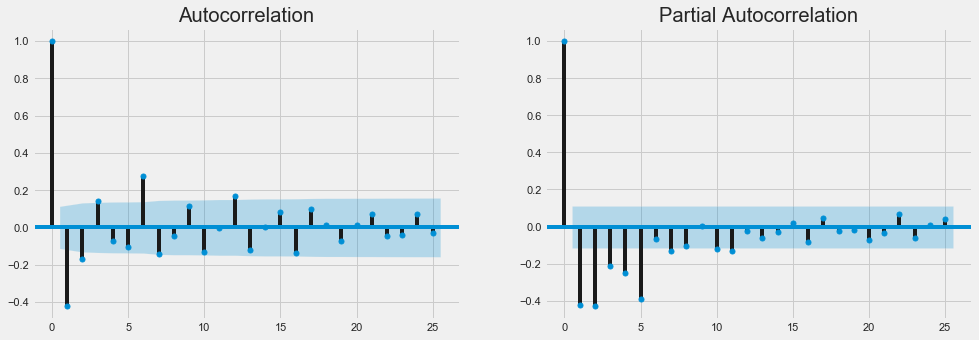

In [121]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_date_3, ax=ax[0])
plot_pacf(series_date_3, ax=ax[1])
plt.show()

### Product #3 Daily: Train & Test Split

In [122]:
series_date_3=ds_daily_P3.Total_Sales_Amount
split_time = 250
time_d=np.arange(len(ds_daily_P3))
xtrain_d=series_date_3[:split_time]
xtest_d=series_date_3[split_time:]
timeTrain_d = time_d[:split_time]
timeTest_d = time_d[split_time:]

### Product #3 Daily: ARIMA Model

In [123]:
s_model = ARIMA(endog=xtrain_d , order=(1, 1, 0))
s_model_fit=s_model.fit()
print(s_model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                  249
Model:                   ARIMA(1, 1, 0)   Log Likelihood               -1979.917
Method:                         css-mle   S.D. of innovations            686.850
Date:                  Mon, 04 Jan 2021   AIC                           3965.833
Time:                          04:42:03   BIC                           3976.385
Sample:                               1   HQIC                          3970.081
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.1094     30.410     -0.168      0.867     -64.712      54.493
ar.L1.D.Total_Sales_Amount    -0.4331      0.057     -7.598      0.

### Product #3 Daily: Daily Trend and Forecast

RMSE Train : 906.3767753359934
RMSE Test : 667.7277857345033


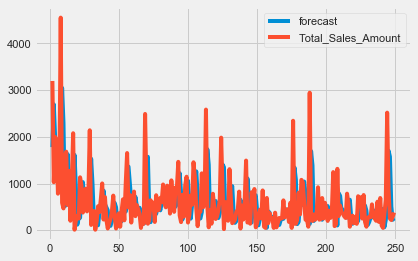

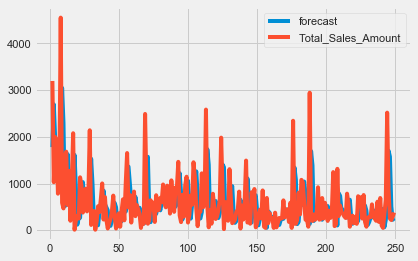

In [124]:
ytrain_pred = s_model_fit.predict()
ytest_pred = s_model_fit.predict(start=min(timeTest_d),end=max(timeTest_d),dynamic=True)

print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain_d)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest_d)**2)))
forecast = s_model_fit.forecast(20, alpha=0.05)
s_model_fit.plot_predict()

In [125]:
s_model_fit.forecast(30)[0]

array([335.06480942, 347.3512854 , 334.707618  , 332.86127609,
       326.33857769, 321.84122436, 316.46668755, 311.47206174,
       306.31289524, 301.22499185, 296.10622418, 291.00082393,
       285.8896342 , 280.78095192, 275.67118365, 270.56188573,
       265.45238409, 260.34297069, 255.23351907, 250.12408401,
       245.01464177, 239.90520264, 234.79576217, 229.68632228,
       224.57688213, 219.4674421 , 214.35800201, 209.24856195,
       204.13912188, 199.02968182])

Based on our daily forecast we can see we have a downward trend for this product

## Product #4: 'Party Bunting'

In [126]:
ds_weekly_P4 = dfp4.groupby(by=['Year','Week'])['Total_Sales_Amount'].sum().reset_index()
ds_daily_P4 = dfp4.groupby(by=['Date'])['Total_Sales_Amount'].sum().reset_index()

### Product #4 Weekly: Weekly Trend

In [127]:
fig = go.Figure(data=[go.Scatter(x=ds_weekly_P4.index,y=ds_weekly_P4.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Week",yaxis_title="Total Sales Amount",title='Product #4: Weekly Trend',height=400,template='ggplot2')
fig.show()

### Product #4 Weekly: Test of Stationarity of Actual Series

In [128]:
output = adfuller(ds_weekly_P4.Total_Sales_Amount)
print('***************************Week*********************************')
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is extreemly high which indicates that we are fail to reject null hypothesis " \
      "and can conclude that series is not stationary ")



***************************Week*********************************
ADF Statistic: -1.55 and P value:0.51080
As we can see the p value is extreemly high which indicates that we are fail to reject null hypothesis and can conclude that series is not stationary 


### Product #4 Weekly: Test of Stationarity with 1 differencing of series

In [129]:
d=1
print('***************************Week*********************************')
series_4 = ds_weekly_P4.Total_Sales_Amount.diff(d)
series_4 = series_4.dropna()
output = adfuller(series_4)

print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Week*********************************
ADF Statistic: -7.96 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #4 Weekly: PACF & ACF

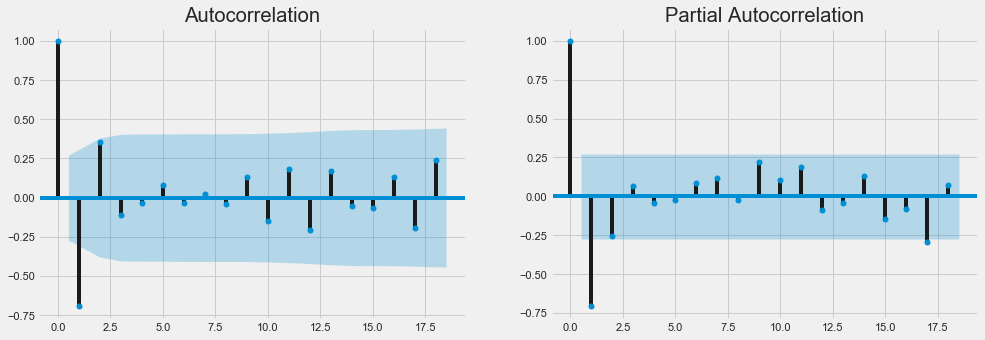

In [130]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_4, ax=ax[0])
plot_pacf(series_4, ax=ax[1])
plt.show()

### Product #4 Weekly: Train & Test Split

In [131]:
series_4=ds_weekly_P4.Total_Sales_Amount
split_time = 42
time=np.arange(len(ds_weekly_P4))
xtrain=series_4[:split_time]
xtest=series_4[split_time:]
timeTrain = time[:split_time]
timeTest = time[split_time:]

### Product #4 Weekly: ARIMA Model

In [132]:
model = ARIMA(xtrain, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                   41
Model:                   ARIMA(1, 1, 0)   Log Likelihood                -337.494
Method:                         css-mle   S.D. of innovations            901.606
Date:                  Mon, 04 Jan 2021   AIC                            680.988
Time:                          04:42:05   BIC                            686.129
Sample:                               1   HQIC                           682.860
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         21.5046     83.340      0.258      0.798    -141.838     184.847
ar.L1.D.Total_Sales_Amount    -0.7069      0.106     -6.692      0.

### Product #4 Weekly: Weekly Trend and Forecast

RMSE Train : 2629.2003150370124
RMSE Test : 1042.6618421295823


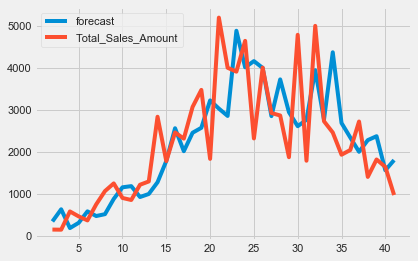

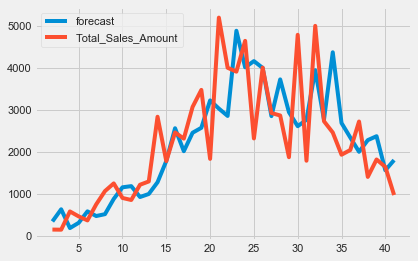

In [133]:
ytrain_pred = model_fit.predict()
ytest_pred = model_fit.predict(start=min(timeTest),end=max(timeTest),dynamic=True)
print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest)**2)))
forecast = model_fit.forecast(20, alpha=0.05)
model_fit.plot_predict()

In [134]:
model_fit.forecast(30)[0]

array([1488.96341566, 1164.82820539, 1430.66203893, 1279.45292292,
       1423.04710819, 1358.24792165, 1440.75983111, 1419.13906679,
       1471.12860097, 1471.08378466, 1507.82150674, 1518.55803695,
       1547.67453788, 1563.79842966, 1589.10666102, 1607.92257874,
       1631.32784511, 1651.48894889, 1673.94331729, 1694.77660091,
       1716.75581241, 1737.92497947, 1759.66675848, 1781.00376408,
       1802.62689978, 1824.0477731 , 1845.61162358, 1867.07440501,
       1888.60863109, 1910.09235369])

Interestingly our weekly forecast model trend is upward for the product

### Product #4 Daily: Daily Trend

In [135]:
ds_daily_P4 = dfp4.groupby(by=['Date'])['Total_Sales_Amount'].sum().reset_index()

In [136]:
fig = go.Figure(data=[go.Scatter(x=ds_daily_P4.Date,y=ds_daily_P4.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Date",yaxis_title="Total Sales Amount",title='Product #4: Daily Trend',height=400,template='ggplot2')
fig.show()

### Product #4 Daily: Test of Stationarity with 1 differencing of series

In [137]:
print('\n***************************Daily*********************************')
series_date_4 = ds_daily_P4.Total_Sales_Amount.diff(d)
series_date_4 = series_date_4.dropna()
output = adfuller(series_date_4)
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Daily*********************************
ADF Statistic: -10.11 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #4 Daily: PACF & ACF

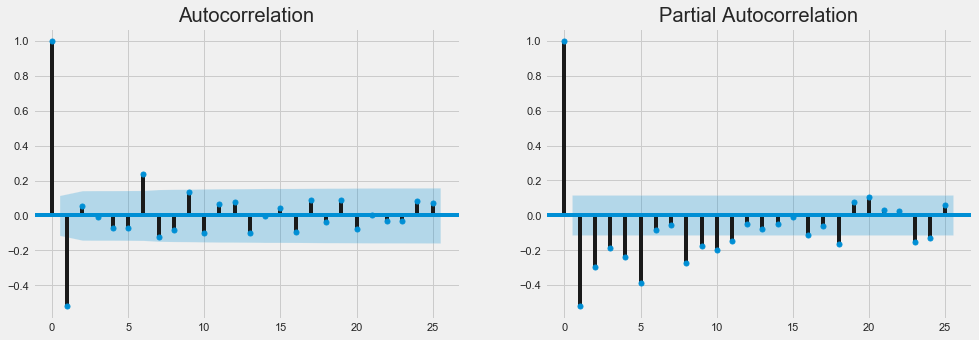

In [138]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_date_4, ax=ax[0])
plot_pacf(series_date_4, ax=ax[1])
plt.show()

### Product #4 Daily: Train & Test Split

In [139]:
series_date_4=ds_daily_P4.Total_Sales_Amount
split_time_4 = 236
time_d=np.arange(len(ds_daily_P4))
xtrain_d_4=series_date_4[:split_time_4]
xtest_d_4=series_date_4[split_time_4:]
timeTrain_d = time_d[:split_time_4]
timeTest_d = time_d[split_time_4:]

### Product #4 Daily: ARIMA Model

In [140]:
s_model_4 = ARIMA(endog=xtrain_d_4 , order=(1, 1, 0))
s_model_fit_4=s_model_4.fit()
print(s_model_fit_4.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                  235
Model:                   ARIMA(1, 1, 0)   Log Likelihood               -1771.549
Method:                         css-mle   S.D. of innovations            454.371
Date:                  Mon, 04 Jan 2021   AIC                           3549.097
Time:                          04:42:06   BIC                           3559.476
Sample:                               1   HQIC                          3553.281
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3745     19.606      0.019      0.985     -38.052      38.801
ar.L1.D.Total_Sales_Amount    -0.5140      0.056     -9.233      0.

### Product #4 Daily: Daily Trend and Forecast

RMSE Train : 625.0065246027209
RMSE Test : 257.0304067579681


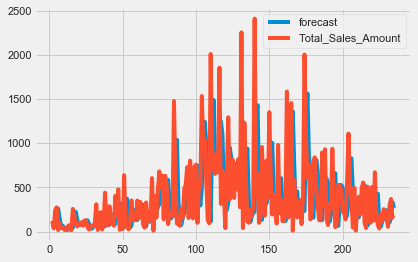

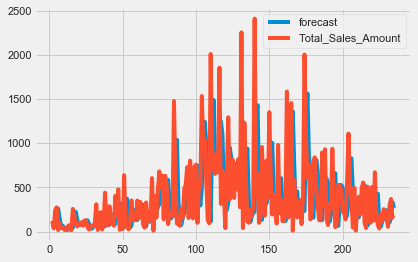

In [141]:
ytrain_pred_4 = s_model_fit_4.predict()
ytest_pred_4 = s_model_fit_4.predict(start=min(timeTest_d),end=max(timeTest_d),dynamic=True)

print('RMSE Train :',np.sqrt(np.mean((ytrain_pred_4 - xtrain_d_4)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred_4 - xtest_d_4)**2)))
forecast = s_model_fit_4.forecast(20, alpha=0.05)
s_model_fit_4.plot_predict()

In [142]:
s_model_fit_4.forecast(30)[0]

array([154.15534469, 151.81555076, 153.58509949, 153.24252761,
       153.98554383, 154.1705893 , 154.64242067, 154.96684977,
       155.36704071, 155.72829157, 156.10955686, 156.48053513,
       156.85680072, 157.23034874, 157.60529353, 157.97952041,
       158.35411629, 158.7285225 , 159.1030262 , 159.4774798 ,
       159.85195914, 160.22642525, 160.60089816, 160.97536758,
       161.3498388 , 161.72430909, 162.09877985, 162.47325037,
       162.84772102, 163.2221916 ])

Based on our daily forecast model this product has slightly upward trend

## Product #5: 'Lunch Bag Red Retrospot'

In [143]:
ds_weekly_P5 = dfp5.groupby(by=['Year','Week'])['Total_Sales_Amount'].sum().reset_index()

### Product #5 Weekly: Weekly Trend

In [144]:
fig = go.Figure(data=[go.Scatter(x=ds_weekly_P5.index,y=ds_weekly_P5.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Week",yaxis_title="Total Sales Amount",title='Product #5: Weekly Trend',height=400,template='ggplot2')
fig.show()

### Product #5 Weekly: Test of Stationarity with 1 differencing of series

In [145]:
d=1
print('***************************Week*********************************')
series_5 = ds_weekly_P5.Total_Sales_Amount.diff(d)
series_5 = series_5.dropna()
output = adfuller(series_5)

print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Week*********************************
ADF Statistic: -5.14 and P value:0.00001
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #5 Weekly: PACF & ACF

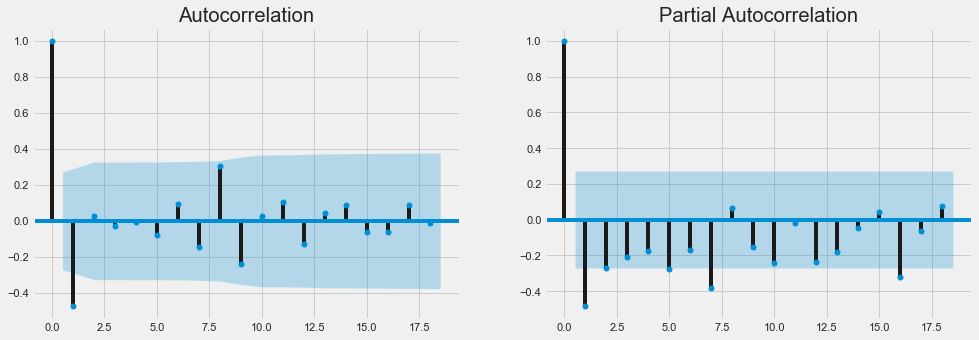

In [146]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_5, ax=ax[0])
plot_pacf(series_5, ax=ax[1])
plt.show()

### Product #5 Weekly: Train & Test Split

In [147]:
series_5=ds_weekly_P5.Total_Sales_Amount
split_time = 42
time=np.arange(len(ds_weekly_P1))
xtrain=series_5[:split_time]
xtest=series_5[split_time:]
timeTrain = time[:split_time]
timeTest = time[split_time:]

### Product #5 Weekly: ARIMA Model

In [148]:
model = ARIMA(xtrain, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                   41
Model:                   ARIMA(1, 1, 0)   Log Likelihood                -298.758
Method:                         css-mle   S.D. of innovations            352.243
Date:                  Mon, 04 Jan 2021   AIC                            603.517
Time:                          04:42:07   BIC                            608.657
Sample:                               1   HQIC                           605.389
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          6.2894     36.948      0.170      0.866     -66.128      78.707
ar.L1.D.Total_Sales_Amount    -0.5014      0.133     -3.772      0.

### Product #5 Weekly: Weekly Trend and Forecast

RMSE Train : 750.9393711026631
RMSE Test : 777.364053672424


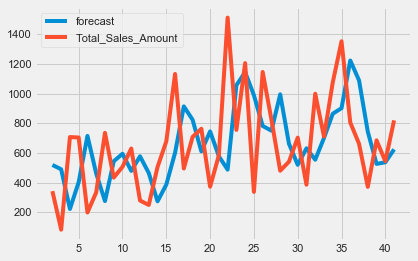

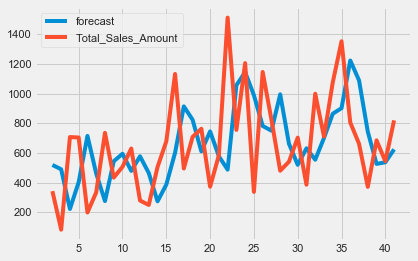

In [149]:
ytrain_pred = model_fit.predict()
ytest_pred = model_fit.predict(start=min(timeTest),end=max(timeTest),dynamic=True)
print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest)**2)))
forecast = model_fit.forecast(20, alpha=0.05)
model_fit.plot_predict()

In [150]:
model_fit.forecast(30)[0]

array([691.18911775, 765.17924614, 737.52277924, 760.83305871,
       758.58803819, 769.15673258, 773.30048616, 780.66577734,
       786.41575332, 792.97566652, 799.12946809, 805.4868986 ,
       811.74222726, 818.04875094, 824.32960486, 830.62332989,
       836.9106012 , 843.20110847, 849.4899932 , 855.77969149,
       862.06898185, 868.35847676, 874.6478691 , 880.93731286,
       887.22673085, 893.51616176, 899.80558619, 906.09501386,
       912.38443991, 918.67386678])

Based on the weekly forecast this product has a upward trend

### Product #5 Daily: Daily Trend

In [151]:
ds_daily_P5 = dfp5.groupby(by=['Date'])['Total_Sales_Amount'].sum().reset_index()

In [152]:
fig = go.Figure(data=[go.Scatter(x=ds_daily_P5.Date,y=ds_daily_P5.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Date",yaxis_title="Total Sales Amount",title='Product #5: Daily Trend',height=400,template='ggplot2')
fig.show()

### Product #5 Daily: Test of Stationarity with 1 differencing of series

In [153]:
print('\n***************************Daily*********************************')
series_date_5 = ds_daily_P5.Total_Sales_Amount.diff(d)
series_date_5 = series_date_5.dropna()
output = adfuller(series_date_5)
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Daily*********************************
ADF Statistic: -9.46 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #5 Daily: PACF & ACF

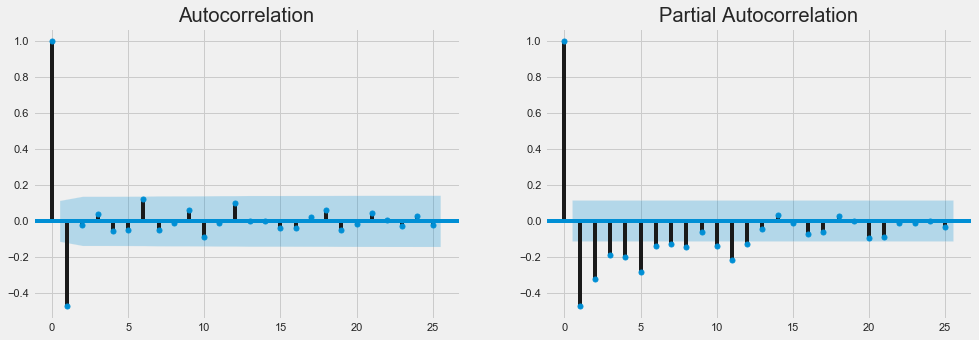

In [154]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_date_5, ax=ax[0])
plot_pacf(series_date_5, ax=ax[1])
plt.show()

### Product #5 Daily: Train & Test Split

In [155]:
series_date_5=ds_daily_P5.Total_Sales_Amount
split_time = 238
time_d=np.arange(len(ds_daily_P5))
xtrain_d=series_date_5[:split_time]
xtest_d=series_date_5[split_time:]
timeTrain_d = time_d[:split_time]
timeTest_d = time_d[split_time:]

### Product #5 Daily: ARIMA Model

In [156]:
s_model = ARIMA(endog=xtrain_d , order=(1, 1, 0))
s_model_fit=s_model.fit()
print(s_model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                  237
Model:                   ARIMA(1, 1, 0)   Log Likelihood               -1493.624
Method:                         css-mle   S.D. of innovations            131.992
Date:                  Mon, 04 Jan 2021   AIC                           2993.249
Time:                          04:42:08   BIC                           3003.653
Sample:                               1   HQIC                          2997.443
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2966      5.826      0.051      0.959     -11.121      11.715
ar.L1.D.Total_Sales_Amount    -0.4737      0.057     -8.305      0.

### Product #5 Daily: Daily Trend and Forecast

RMSE Train : 177.90099590826765
RMSE Test : 153.11877435188427


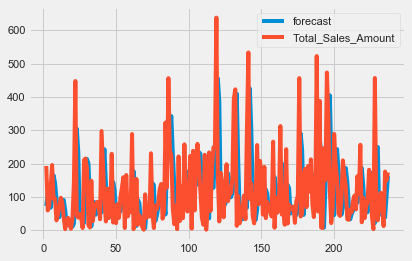

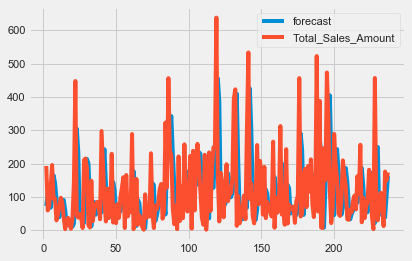

In [157]:
ytrain_pred = s_model_fit.predict()
ytest_pred = s_model_fit.predict(start=min(timeTest_d),end=max(timeTest_d),dynamic=True)

print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain_d)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest_d)**2)))
forecast = s_model_fit.forecast(20, alpha=0.05)
s_model_fit.plot_predict()

In [158]:
s_model_fit.forecast(30)[0]

array([162.35537431, 167.95358961, 165.73860002, 167.2249843 ,
       166.95790521, 167.52149978, 167.69157673, 168.04807601,
       168.31626086, 168.62628318, 168.91648571, 169.21607753,
       169.51122133, 169.8084723 , 170.10472503, 170.40145067,
       170.69795227, 170.99456001, 171.29111747, 171.58769874,
       171.88426874, 172.18084407, 172.47741688, 172.77399089,
       173.07056432, 173.36713803, 173.66371161, 173.96028525,
       174.25685886, 174.55343248])

Based on our daily forecast model this product has a upward trend.

## Product #6: 'Assorted Colour Bird Ornament'

In [159]:
ds_weekly_P6 = dfp6.groupby(by=['Year','Week'])['Total_Sales_Amount'].sum().reset_index()

### Product #6 Weekly: Weekly Trend

In [160]:
fig = go.Figure(data=[go.Scatter(x=ds_weekly_P6.index,y=ds_weekly_P6.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Week",yaxis_title="Total Sales Amount",title='Product #6: Weekly Trend',height=400,template='ggplot2')
fig.show()

### Product #6 Weekly: Test of Stationarity with 1 differencing of series

In [161]:
d=1
print('***************************Week*********************************')
series_6 = ds_weekly_P6.Total_Sales_Amount.diff(d)
series_6 = series_6.dropna()
output = adfuller(series_6)

print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Week*********************************
ADF Statistic: -7.87 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #6 Weekly: PACF & ACF

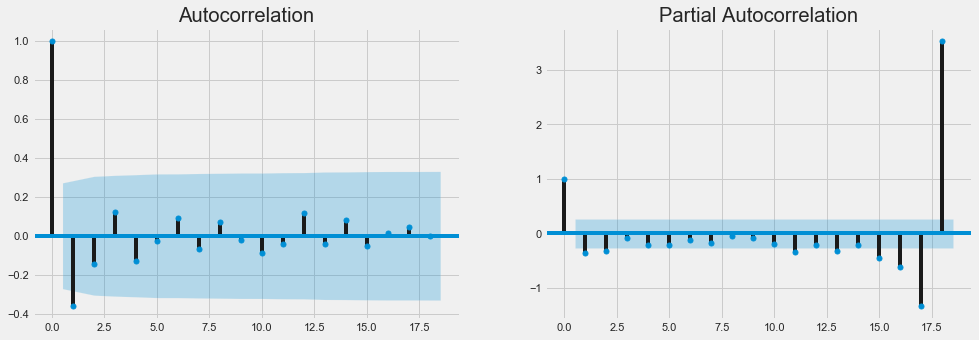

In [162]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_6, ax=ax[0])
plot_pacf(series_6, ax=ax[1])
plt.show()

### Product #6 Weekly: Train & Test Split

In [163]:
series_6=ds_weekly_P6.Total_Sales_Amount
split_time = 42
time=np.arange(len(ds_weekly_P6))
xtrain=series_6[:split_time]
xtest=series_6[split_time:]
timeTrain = time[:split_time]
timeTest = time[split_time:]

### Product #6 Weekly: ARIMA Model

In [164]:
model = ARIMA(xtrain, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                   41
Model:                   ARIMA(1, 1, 0)   Log Likelihood                -341.727
Method:                         css-mle   S.D. of innovations           1006.345
Date:                  Mon, 04 Jan 2021   AIC                            689.453
Time:                          04:42:10   BIC                            694.594
Sample:                               1   HQIC                           691.325
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.1447    115.646     -0.044      0.965    -231.807     221.517
ar.L1.D.Total_Sales_Amount    -0.3681      0.143     -2.581      0.

### Product #6 Weekly: Weekly Trend and Forecast

RMSE Train : 1412.630042593545
RMSE Test : 1580.884087123212


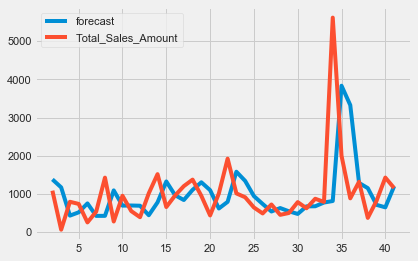

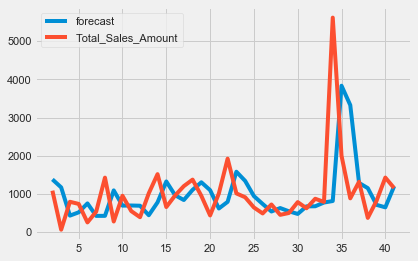

In [165]:
ytrain_pred = model_fit.predict()
ytest_pred = model_fit.predict(start=min(timeTest),end=max(timeTest),dynamic=True)
print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest)**2)))
forecast = model_fit.forecast(20, alpha=0.05)
model_fit.plot_predict()

In [166]:
model_fit.forecast(30)[0]

array([1251.18065929, 1209.74787688, 1217.9590317 , 1207.89870357,
       1204.56320647, 1198.75263099, 1193.8530097 , 1188.61811113,
       1183.50661158, 1178.34969495, 1173.2094941 , 1168.06314099,
       1162.91905223, 1157.77413008, 1152.62951465, 1147.48478633,
       1142.34009957, 1137.19539751, 1132.05070108, 1126.90600257,
       1121.76130483, 1116.61660681, 1111.47190889, 1106.32721094,
       1101.182513  , 1096.03781505, 1090.8931171 , 1085.74841916,
       1080.60372121, 1075.45902327])

Based on our weekly forecast model this product has a downward trend 

### Product #6 Daily: Daily Trend

In [167]:
ds_daily_P6 = dfp6.groupby(by=['Date'])['Total_Sales_Amount'].sum().reset_index()

In [168]:
fig = go.Figure(data=[go.Scatter(x=ds_daily_P6.Date,y=ds_daily_P6.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Date",yaxis_title="Total Sales Amount",title='Product #6: Daily Trend',height=400,template='ggplot2')
fig.show()

### Product #6 Daily: Test of Stationarity with 1 differencing of series

In [169]:
print('\n***************************Daily*********************************')
series_date_6 = ds_daily_P6.Total_Sales_Amount.diff(d)
series_date_6 = series_date_6.dropna()
output = adfuller(series_date_6)
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Daily*********************************
ADF Statistic: -9.99 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #6 Daily: PACF & ACF

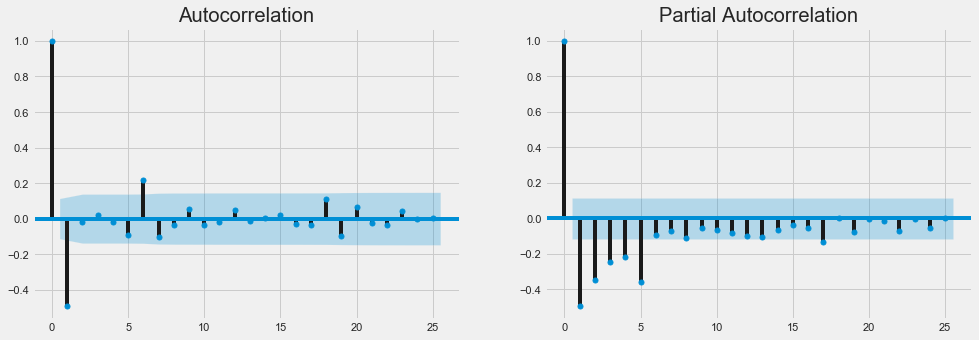

In [170]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_date_6, ax=ax[0])
plot_pacf(series_date_6, ax=ax[1])
plt.show()

### Product #6 Daily: Train & Test Split

In [171]:
series_date_6=ds_daily_P6.Total_Sales_Amount
split_time = 240
time_d=np.arange(len(ds_daily_P6))
xtrain_d=series_date_6[:split_time]
xtest_d=series_date_6[split_time:]
timeTrain_d = time_d[:split_time]
timeTest_d = time_d[split_time:]

### Product #6 Daily: ARIMA Model

In [172]:
s_model = ARIMA(endog=xtrain_d , order=(1, 1, 0))
s_model_fit=s_model.fit()
print(s_model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                  239
Model:                   ARIMA(1, 1, 0)   Log Likelihood               -1784.992
Method:                         css-mle   S.D. of innovations            423.715
Date:                  Mon, 04 Jan 2021   AIC                           3575.984
Time:                          04:42:11   BIC                           3586.413
Sample:                               1   HQIC                          3580.187
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4950     18.373     -0.081      0.935     -37.506      34.516
ar.L1.D.Total_Sales_Amount    -0.4938      0.056     -8.800      0.

### Product #6 Daily: Daily Trend and Forecast

RMSE Train : 459.64873798363493
RMSE Test : 375.0939642290524


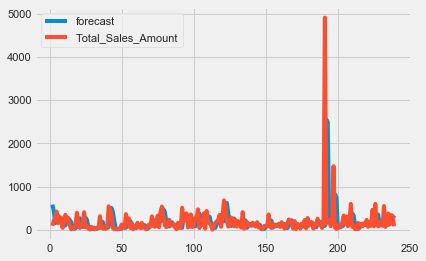

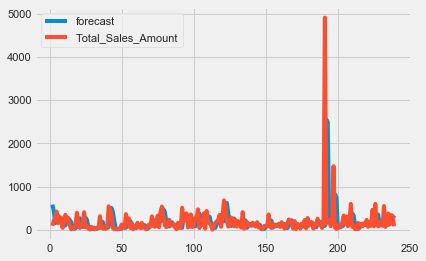

In [173]:
ytrain_pred = s_model_fit.predict()
ytest_pred = s_model_fit.predict(start=min(timeTest_d),end=max(timeTest_d),dynamic=True)

print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain_d)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest_d)**2)))
forecast = s_model_fit.forecast(20, alpha=0.05)
s_model_fit.plot_predict()

In [174]:
s_model_fit.forecast(30)[0]

array([198.03332417, 138.06711131, 165.44582788, 149.6927225 ,
       155.23855315, 150.26675075, 150.48866342, 148.14586632,
       147.06954921, 145.3678313 , 143.97494271, 142.42955103,
       140.95946695, 139.4521952 , 137.9632871 , 136.46531085,
       134.97181254, 133.47610297, 131.98148535, 130.48632852,
       128.99143795, 127.4964159 , 126.00145877, 124.50646959,
       123.01149624, 121.51651506, 120.02153775, 118.52655854,
       117.03158026, 115.53660152])

Based on our daily forecasts the product has slight downward trend

## Product #7: 'Set of 3 Cake Tins Pantry Design'

In [175]:
ds_weekly_P7 = dfp7.groupby(by=['Year','Week'])['Total_Sales_Amount'].sum().reset_index()

### Product #7 Weekly: Weekly Trend

In [176]:
fig = go.Figure(data=[go.Scatter(x=ds_weekly_P7.index,y=ds_weekly_P7.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Week",yaxis_title="Total Sales Amount",title='Product #7: Weekly TrendWeekly Trend',height=400,template='ggplot2')
fig.show()

### Product #7 Weekly: Test of Stationarity with 1 differencing of series

In [177]:
d=1
print('***************************Week*********************************')
series_7 = ds_weekly_P7.Total_Sales_Amount.diff(d)
series_7 = series_7.dropna()
output = adfuller(series_7)

print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Week*********************************
ADF Statistic: -7.59 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #7 Weekly: PACF & ACF

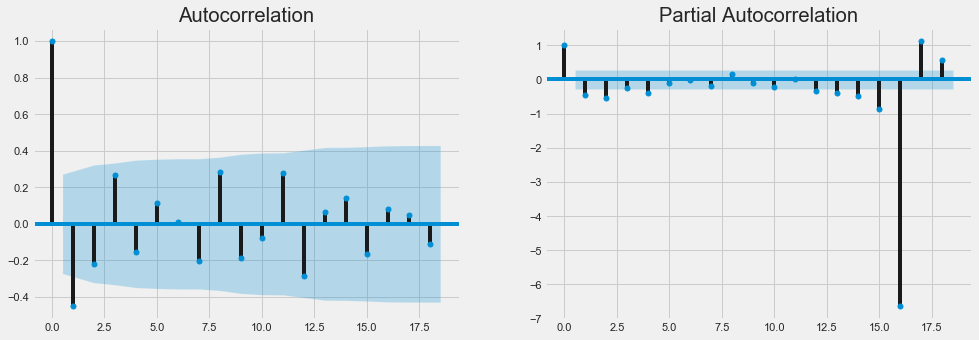

In [178]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_7, ax=ax[0])
plot_pacf(series_7, ax=ax[1])
plt.show()

### Product #7 Weekly: Train & Test Split

In [179]:
series_7=ds_weekly_P7.Total_Sales_Amount
split_time = 42
time=np.arange(len(ds_weekly_P7))
xtrain=series_7[:split_time]
xtest=series_7[split_time:]
timeTrain = time[:split_time]
timeTest = time[split_time:]

### Product #7 Weekly: ARIMA Model

In [180]:
model = ARIMA(xtrain, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                   41
Model:                   ARIMA(1, 1, 0)   Log Likelihood                -285.710
Method:                         css-mle   S.D. of innovations            256.466
Date:                  Mon, 04 Jan 2021   AIC                            577.419
Time:                          04:42:12   BIC                            582.560
Sample:                               1   HQIC                           579.291
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -4.3827     28.079     -0.156      0.877     -59.416      50.651
ar.L1.D.Total_Sales_Amount    -0.4376      0.140     -3.117      0.

### Product #7 Weekly: Weekly Trend and Forecast

RMSE Train : 469.5124619442146
RMSE Test : 347.8962531827525


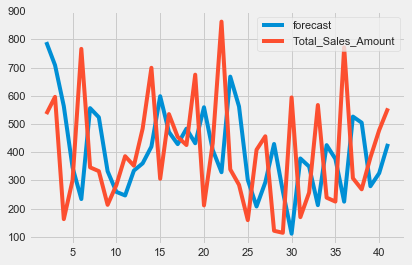

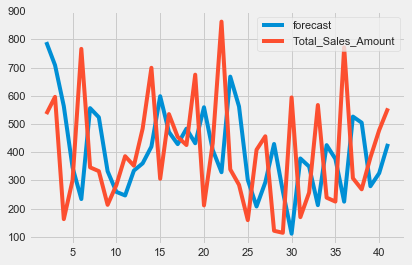

In [181]:
ytrain_pred = model_fit.predict()
ytest_pred = model_fit.predict(start=min(timeTest),end=max(timeTest),dynamic=True)
print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest)**2)))
forecast = model_fit.forecast(20, alpha=0.05)
model_fit.plot_predict()

In [182]:
model_fit.forecast(30)[0]

array([515.19054104, 526.42110018, 515.20560044, 513.81317306,
       508.12187294, 504.31188919, 499.67858466, 495.40559013,
       490.97491308, 486.61324266, 482.22137285, 477.84271921,
       473.45828177, 469.0763755 , 464.69336151, 460.31083229,
       455.92809092, 451.5454424 , 447.16275324, 442.78008187,
       438.39740271, 434.01472696, 429.63204972, 425.24937313,
       420.86669626, 416.48401951, 412.1013427 , 407.71866592,
       403.33598913, 398.95331235])

Based on our weekly forecast model we can slight downward trend for this product

### Product #7 Daily: Daily Trend

In [183]:
ds_daily_P7 = dfp7.groupby(by=['Date'])['Total_Sales_Amount'].sum().reset_index()

In [184]:
fig = go.Figure(data=[go.Scatter(x=ds_daily_P7.Date,y=ds_daily_P7.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Date",yaxis_title="Total Sales Amount",title='Product #7: Daily Trend',height=400,template='ggplot2')
fig.show()

### Product #7 Daily: Test of Stationarity with 1 differencing of series

In [185]:
print('\n***************************Daily*********************************')
series_date_7 = ds_daily_P7.Total_Sales_Amount.diff(d)
series_date_7 = series_date_7.dropna()
output = adfuller(series_date_7)
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Daily*********************************
ADF Statistic: -8.97 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #7 Daily: PACF & ACF

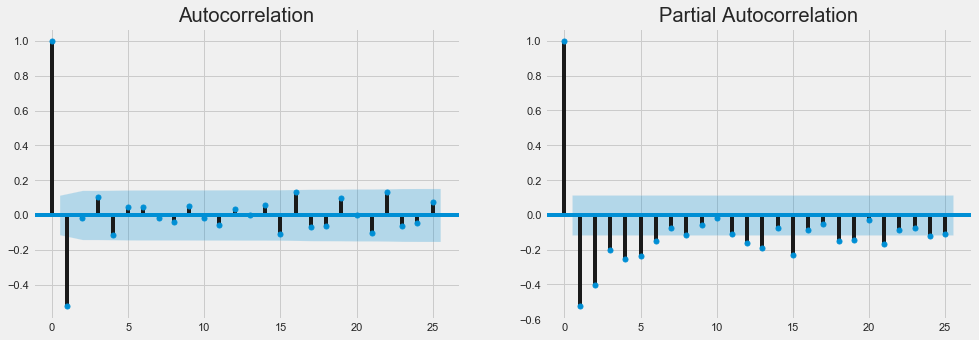

In [186]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_date_7, ax=ax[0])
plot_pacf(series_date_7, ax=ax[1])
plt.show()

### Product #7 Daily: Train & Test Split

In [187]:
series_date_7=ds_daily_P7.Total_Sales_Amount
split_time = 238
time_d=np.arange(len(ds_daily_P7))
xtrain_d=series_date_7[:split_time]
xtest_d=series_date_7[split_time:]
timeTrain_d = time_d[:split_time]
timeTest_d = time_d[split_time:]

### Product #7 Daily: ARIMA Model

In [188]:
s_model = ARIMA(endog=xtrain_d , order=(1, 1, 0))
s_model_fit=s_model.fit()
print(s_model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                  237
Model:                   ARIMA(1, 1, 0)   Log Likelihood               -1468.066
Method:                         css-mle   S.D. of innovations            118.482
Date:                  Mon, 04 Jan 2021   AIC                           2942.133
Time:                          04:42:13   BIC                           2952.537
Sample:                               1   HQIC                          2946.326
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.4078      5.065     -0.081      0.936     -10.334       9.519
ar.L1.D.Total_Sales_Amount    -0.5218      0.055     -9.453      0.

### Product #7 Daily: Daily Trend and Forecast

RMSE Train : 139.3416354337633
RMSE Test : 71.53195291193856


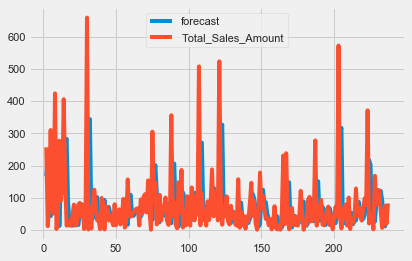

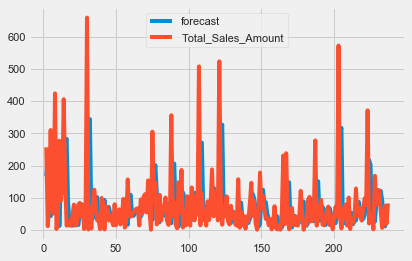

In [189]:
ytrain_pred = s_model_fit.predict()
ytest_pred = s_model_fit.predict(start=min(timeTest_d),end=max(timeTest_d),dynamic=True)

print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain_d)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest_d)**2)))
forecast = s_model_fit.forecast(20, alpha=0.05)
s_model_fit.plot_predict()

In [190]:
s_model_fit.forecast(30)[0]

array([48.76227375, 65.5375642 , 56.16360539, 60.43446946, 57.58538948,
       58.45153569, 57.37905633, 57.31816251, 56.72941776, 56.41610854,
       55.95907554, 55.5770384 , 55.15586801, 54.75511757, 54.34371188,
       53.93786616, 53.52911922, 53.12188616, 52.71386314, 52.30625232,
       51.89842642, 51.49071275, 51.08294052, 50.67519884, 50.26744122,
       49.85969192, 49.45193828, 49.0441869 , 48.63643434, 48.2286824 ])

Based on our daily forecast model we can see slight downward trend for this product

## Product #8: 'Pack of 72 Retrospot Cake Cases'

In [191]:
ds_weekly_P8 = dfp8.groupby(by=['Year','Week'])['Total_Sales_Amount'].sum().reset_index()

### Product #8 Weekly: Weekly Trend

In [192]:
fig = go.Figure(data=[go.Scatter(x=ds_weekly_P8.index,y=ds_weekly_P8.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Week",yaxis_title="Total Sales Amount",title='Product #8: Weekly Trend',height=400,template='ggplot2')
fig.show()

### Product #8 Weekly: Test of Stationarity with 1 differencing of series

In [193]:
d=1
print('***************************Week*********************************')
series_8 = ds_weekly_P8.Total_Sales_Amount.diff(d)
series_8 = series_8.dropna()
output = adfuller(series_8)

print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Week*********************************
ADF Statistic: -5.90 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #8 Weekly: PACF & ACF

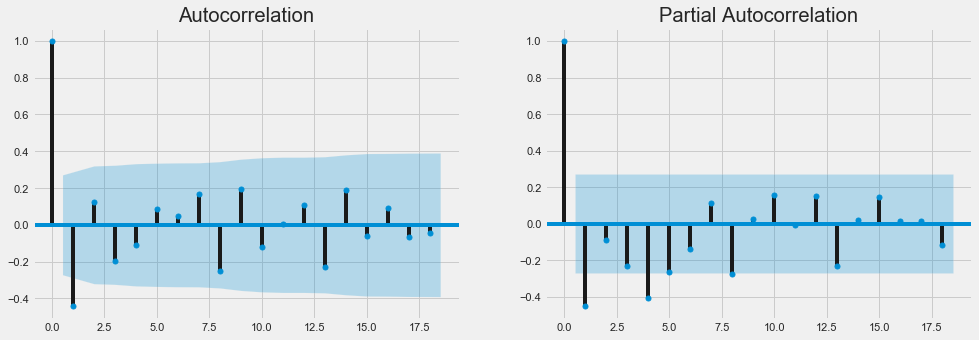

In [194]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_8, ax=ax[0])
plot_pacf(series_8, ax=ax[1])
plt.show()

### Product #8 Weekly: Train & Test Split

In [195]:
series_8=ds_weekly_P8.Total_Sales_Amount
split_time = 42
time=np.arange(len(ds_weekly_P8))
xtrain=series_8[:split_time]
xtest=series_8[split_time:]
timeTrain = time[:split_time]
timeTest = time[split_time:]

### Product #8 Weekly: ARIMA Model

In [196]:
model = ARIMA(xtrain, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                   41
Model:                   ARIMA(1, 1, 0)   Log Likelihood                -269.114
Method:                         css-mle   S.D. of innovations            170.854
Date:                  Mon, 04 Jan 2021   AIC                            544.229
Time:                          04:42:15   BIC                            549.369
Sample:                               1   HQIC                           546.101
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          6.2318     17.590      0.354      0.725     -28.245      40.708
ar.L1.D.Total_Sales_Amount    -0.5299      0.129     -4.098      0.

### Product #8 Weekly: Weekly Trend and Forecast

RMSE Train : 459.59555356394054
RMSE Test : 494.4852514241298


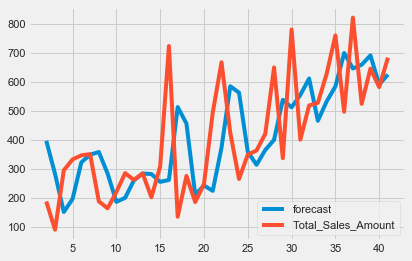

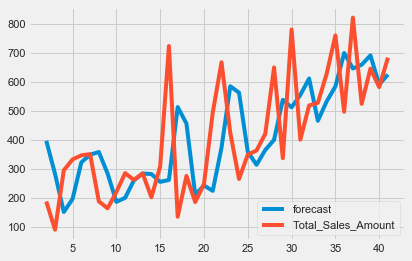

In [197]:
ytrain_pred = model_fit.predict()
ytest_pred = model_fit.predict(start=min(timeTest),end=max(timeTest),dynamic=True)
print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest)**2)))
forecast = model_fit.forecast(20, alpha=0.05)
model_fit.plot_predict()

In [198]:
model_fit.forecast(30)[0]

array([638.31091107, 671.29661663, 663.35218386, 677.09563614,
       679.34720549, 687.68804417, 692.8023271 , 699.62628346,
       705.54432545, 711.94238943, 718.08610143, 724.36458836,
       730.57166134, 736.81657483, 743.04143755, 749.27692469,
       755.5067822 , 761.73962272, 767.97088262, 774.20298005,
       780.43463369, 786.66652248, 792.89828668, 799.13011689,
       805.36191212, 811.59372589, 817.82552984, 824.05733899,
       830.28914538, 836.52095324])

Based on our weekly forecast model we can see a upward trend after a small peak for this product

### Product #8 Daily: Daily Trend

In [199]:
ds_daily_P8 = dfp8.groupby(by=['Date'])['Total_Sales_Amount'].sum().reset_index()

In [200]:
fig = go.Figure(data=[go.Scatter(x=ds_daily_P8.Date,y=ds_daily_P8.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Date",yaxis_title="Total Sales Amount",title='Product #8: Daily Trend',height=400,template='ggplot2')
fig.show()

### Product #8 Weekly: Test of Stationarity with 1 differencing of series

In [201]:
print('\n***************************Daily*********************************')
series_date_8 = ds_daily_P8.Total_Sales_Amount.diff(d)
series_date_8 = series_date_8.dropna()
output = adfuller(series_date_8)
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Daily*********************************
ADF Statistic: -8.73 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #8 Weekly: PACF & ACF

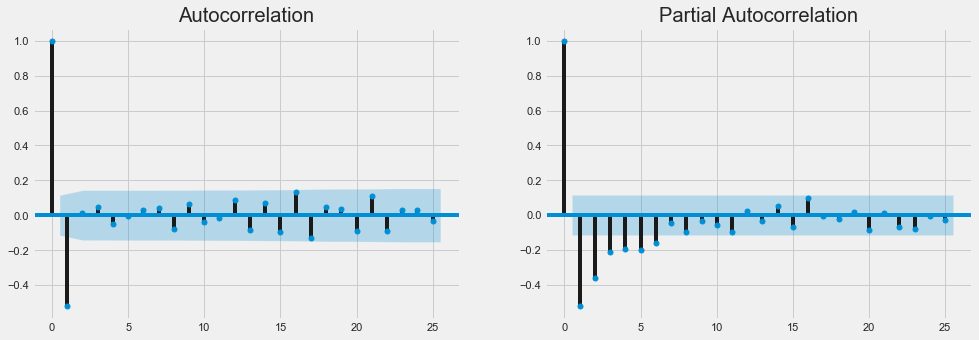

In [202]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_date_8, ax=ax[0])
plot_pacf(series_date_8, ax=ax[1])
plt.show()

### Product #8 Weekly: Train & Test Split

In [203]:
series_date_8=ds_daily_P8.Total_Sales_Amount
split_time = 245
time_d=np.arange(len(ds_daily_P8))
xtrain_d=series_date_8[:split_time]
xtest_d=series_date_8[split_time:]
timeTrain_d = time_d[:split_time]
timeTest_d = time_d[split_time:]

### Product #8 Weekly: ARIMA Model

In [204]:
s_model = ARIMA(endog=xtrain_d , order=(1, 1, 0))
s_model_fit=s_model.fit()
print(s_model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                  244
Model:                   ARIMA(1, 1, 0)   Log Likelihood               -1423.869
Method:                         css-mle   S.D. of innovations             82.756
Date:                  Mon, 04 Jan 2021   AIC                           2853.738
Time:                          04:42:16   BIC                           2864.230
Sample:                               1   HQIC                          2857.964
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.3455      3.458     -0.100      0.920      -7.122       6.431
ar.L1.D.Total_Sales_Amount    -0.5346      0.055     -9.757      0.

### Product #8 Daily: Daily Trend and Forecast

RMSE Train : 113.98033250887431
RMSE Test : 91.1920147126132


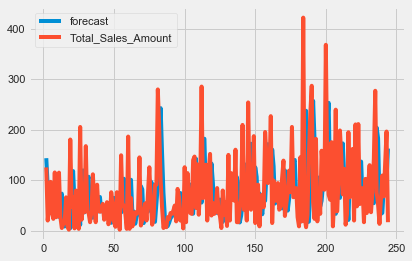

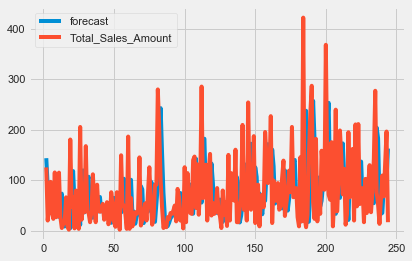

In [205]:
ytrain_pred = s_model_fit.predict()
ytest_pred = s_model_fit.predict(start=min(timeTest_d),end=max(timeTest_d),dynamic=True)

print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain_d)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest_d)**2)))
forecast = s_model_fit.forecast(20, alpha=0.05)
s_model_fit.plot_predict()

In [206]:
s_model_fit.forecast(30)[0]

array([112.03545661,  60.43596998,  87.48879532,  72.49731737,
        79.98100124,  75.4503845 ,  77.34212059,  75.80073001,
        76.09454828,  75.40733909,  75.24454698,  74.80142299,
        74.50815294,  74.13477711,  73.80422255,  73.45077749,
        73.10956876,  72.76181899,  72.41756578,  72.07144346,
        71.72632029,  71.38066301,  71.03529125,  70.68976686,
        70.34432406,  69.99883765,  69.65337455,  69.30789899,
        68.96243008,  68.61695762])

Based on our daily forecast model we can see a up and downward trend on this product

### Product #9: 'Lunch Bag  Black Skull.'

In [207]:
ds_weekly_P9 = dfp9.groupby(by=['Year','Week'])['Total_Sales_Amount'].sum().reset_index()

### Product #9 Weekly: Weekly Trend

In [208]:
fig = go.Figure(data=[go.Scatter(x=ds_weekly_P9.index,y=ds_weekly_P9.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Week",yaxis_title="Total Sales Amount",title='Product #9: Weekly Trend',height=400,template='ggplot2')
fig.show()

### Product #9 Weekly: Test of Stationarity with 1 differencing of series

In [209]:
d=1
print('***************************Week*********************************')
series_9 = ds_weekly_P9.Total_Sales_Amount.diff(d)
series_9 = series_9.dropna()
output = adfuller(series_9)

print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Week*********************************
ADF Statistic: -7.09 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #9 Weekly: PACF & ACF

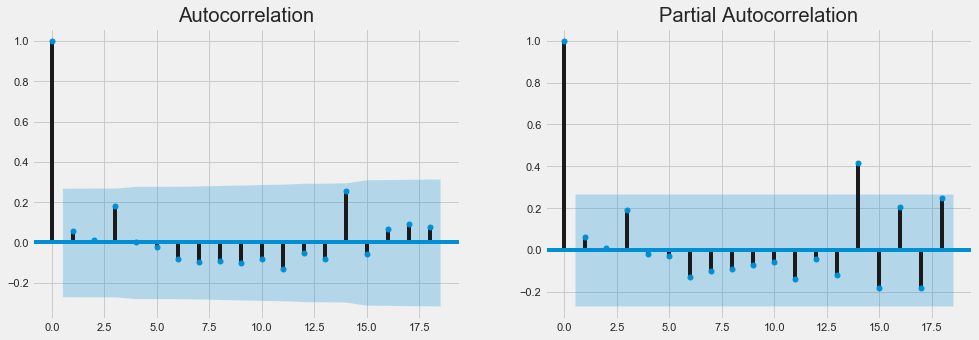

In [210]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_1, ax=ax[0])
plot_pacf(series_1, ax=ax[1])
plt.show()

### Product #9 Weekly: Train & Test Split

In [211]:
series_9=ds_weekly_P9.Total_Sales_Amount
split_time = 38
time=np.arange(len(ds_weekly_P9))
xtrain=series_9[:split_time]
xtest=series_9[split_time:]
timeTrain = time[:split_time]
timeTest = time[split_time:]

### Product #9 Weekly: ARIMA Model

In [212]:
model = ARIMA(xtrain, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                   37
Model:                   ARIMA(1, 1, 0)   Log Likelihood                -298.107
Method:                         css-mle   S.D. of innovations            761.192
Date:                  Mon, 04 Jan 2021   AIC                            602.214
Time:                          04:42:17   BIC                            607.047
Sample:                               1   HQIC                           603.918
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.0172     86.781     -0.023      0.982    -172.106     168.071
ar.L1.D.Total_Sales_Amount    -0.4544      0.156     -2.919      0.

### Product #9 Weekly: Weekly Trend and Forecast

RMSE Train : 999.925532981403
RMSE Test : 889.623574713618


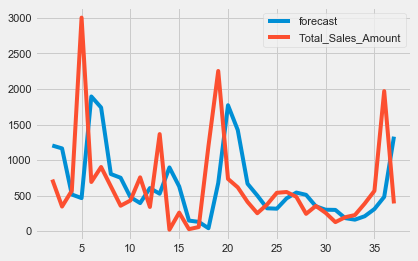

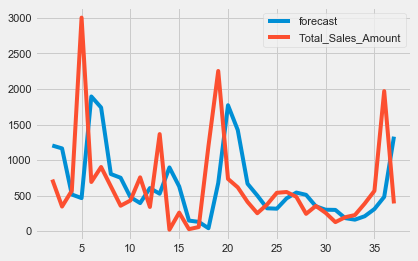

In [213]:
ytrain_pred = model_fit.predict()
ytest_pred = model_fit.predict(start=min(timeTest),end=max(timeTest),dynamic=True)
print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest)**2)))
forecast = model_fit.forecast(20, alpha=0.05)
model_fit.plot_predict()

In [214]:
model_fit.forecast(30)[0]

array([1105.76028591,  777.99419793,  924.00949184,  854.72070205,
        883.27418769,  867.36446252,  871.66049306,  866.77426806,
        866.06080541,  863.45108257,  861.7030917 ,  859.56349741,
        857.60186244,  855.55935606,  853.55360069,  851.53114428,
        849.51627745,  847.49796163,  845.48121317,  843.46375243,
        841.44661538,  839.42933124,  837.41211394,  835.39486626,
        833.37763239,  831.36039224,  829.34315495,  827.32591636,
        825.30867835,  823.29144009])

Based on weekly forecast model we can see a sligt downward trend for this product

### Product #9 Daily: Daily Trend

In [215]:
ds_daily_P9 = dfp9.groupby(by=['Date'])['Total_Sales_Amount'].sum().reset_index()

In [216]:
fig = go.Figure(data=[go.Scatter(x=ds_daily_P9.Date,y=ds_daily_P9.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Date",yaxis_title="Total Sales Amount",title='Product #9: Daily Trend',height=400,template='ggplot2')
fig.show()

### Product #9 Weekly: Test of Stationarity with 1 differencing of series

In [217]:
print('\n***************************Daily*********************************')
series_date_9 = ds_daily_P9.Total_Sales_Amount.diff(d)
series_date_9 = series_date_9.dropna()
output = adfuller(series_date_9)
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Daily*********************************
ADF Statistic: -7.76 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #9 Weekly: PACF & ACF

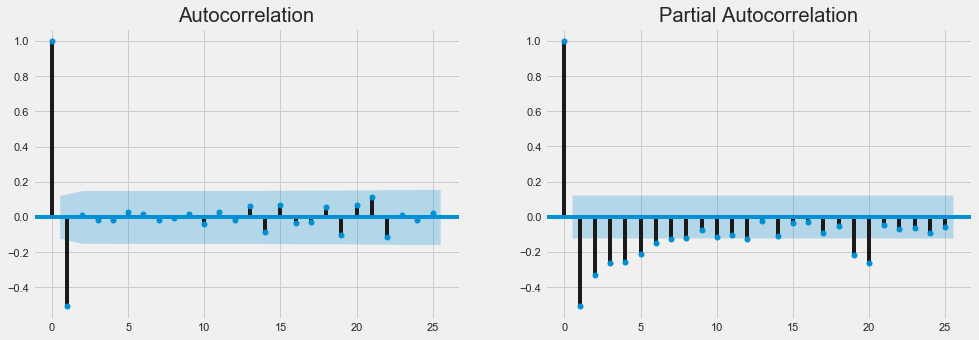

In [218]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_date_9, ax=ax[0])
plot_pacf(series_date_9, ax=ax[1])
plt.show()

### Product #9 Weekly: Train & Test Split

In [219]:
series_date_9=ds_daily_P9.Total_Sales_Amount
split_time = 206
time_d=np.arange(len(ds_daily_P9))
xtrain_d=series_date_9[:split_time]
xtest_d=series_date_9[split_time:]
timeTrain_d = time_d[:split_time]
timeTest_d = time_d[split_time:]

### Product #9 Weekly: ARIMA Model

In [220]:
s_model = ARIMA(endog=xtrain_d , order=(1, 1, 0))
s_model_fit=s_model.fit()
print(s_model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                  205
Model:                   ARIMA(1, 1, 0)   Log Likelihood               -1478.011
Method:                         css-mle   S.D. of innovations            327.069
Date:                  Mon, 04 Jan 2021   AIC                           2962.023
Time:                          04:42:18   BIC                           2971.992
Sample:                               1   HQIC                          2966.055
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.8202     15.253     -0.054      0.957     -30.715      29.074
ar.L1.D.Total_Sales_Amount    -0.5001      0.060     -8.315      0.

### Product #9 Daily: Daily Trend and Forecast

RMSE Train : 349.11737276846293
RMSE Test : 276.9159975138687


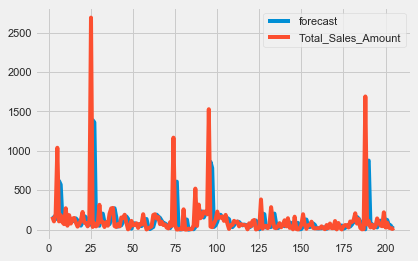

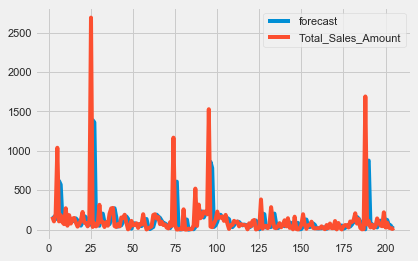

In [221]:
ytrain_pred = s_model_fit.predict()
ytest_pred = s_model_fit.predict(start=min(timeTest_d),end=max(timeTest_d),dynamic=True)

print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain_d)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest_d)**2)))
forecast = s_model_fit.forecast(20, alpha=0.05)
s_model_fit.plot_predict()

In [222]:
s_model_fit.forecast(30)[0]

array([15.26292623, 17.94705236, 15.37424669, 15.43057301, 14.17200021,
       13.57104358, 12.64119554, 11.87583487, 11.02820968, 10.22172717,
        9.39466811,  8.57789993,  7.75598501,  6.93664411,  6.11601587,
        5.29603146,  4.47572506,  3.6555797 ,  2.83535379,  2.01516817,
        1.1949624 ,  0.37476671, -0.44543403, -1.26563224, -2.08583171,
       -2.90603055, -3.72622971, -4.54642871, -5.36662779, -6.18682683])

Based on our daily forecast model we see a slight downward trend for this product

## Product #10: 'Heart of Wicker Small'

In [223]:
ds_weekly_P10 = dfp10.groupby(by=['Year','Week'])['Total_Sales_Amount'].sum().reset_index()

### Product #10 Weekly: Weekly Trend 

In [224]:
fig = go.Figure(data=[go.Scatter(x=ds_weekly_P10.index,y=ds_weekly_P10.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Weeks in a Year",yaxis_title="Total Sales Amount",title='Product #10: Weekly Trend',height=400,template='ggplot2')
fig.show()

### Product #10 Weekly: Test of Stationarity with 1 Differencing of Series

In [225]:
d=1
print('***************************Week*********************************')
series_10 = ds_weekly_P10.Total_Sales_Amount.diff(d)
series_10 = series_1.dropna()
output = adfuller(series_10)

print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis ")


***************************Week*********************************
ADF Statistic: -6.69 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis 


### Product #10 Weekly: PACF & ACF

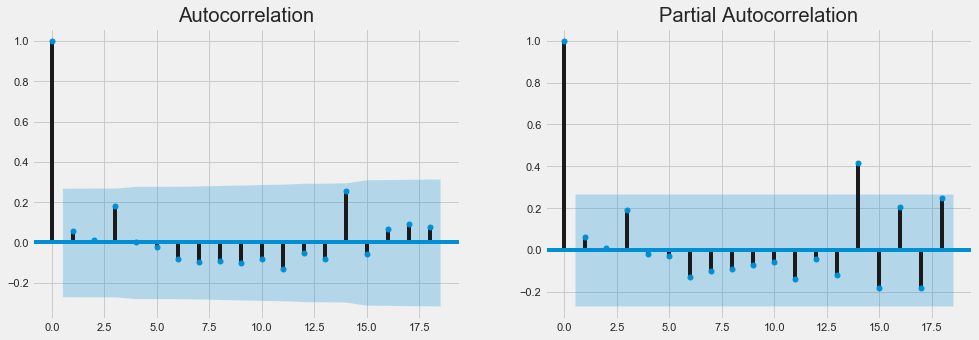

In [226]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_1, ax=ax[0])
plot_pacf(series_1, ax=ax[1])
plt.show()

### Product #10 Weekly: Train & Test Split

In [227]:
series_10=ds_weekly_P10.Total_Sales_Amount
split_time = 45
time=np.arange(len(ds_weekly_P10))
xtrain=series_10[:split_time]
xtest=series_10[split_time:]
timeTrain = time[:split_time]
timeTest = time[split_time:]

### Product #10 Weekly: ARIMA Model

In [228]:
model = ARIMA(xtrain, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                   44
Model:                   ARIMA(1, 1, 0)   Log Likelihood                -309.566
Method:                         css-mle   S.D. of innovations            274.471
Date:                  Mon, 04 Jan 2021   AIC                            625.131
Time:                          04:42:20   BIC                            630.484
Sample:                               1   HQIC                           627.116
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.8034     30.132      0.060      0.953     -57.255      60.862
ar.L1.D.Total_Sales_Amount    -0.3823      0.139     -2.752      0.

### Product #10 Weekly: Weekly Trend and Forecast

RMSE Train : 597.4041969744953
RMSE Test : 704.3164520695769


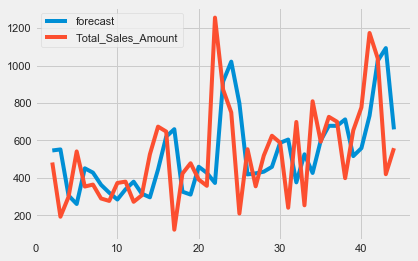

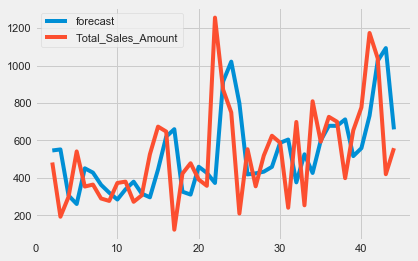

In [229]:
ytrain_pred = model_fit.predict()
ytest_pred = model_fit.predict(start=min(timeTest),end=max(timeTest),dynamic=True)
print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest)**2)))
forecast = model_fit.forecast(20, alpha=0.05)
model_fit.plot_predict()

In [230]:
model_fit.forecast(30)[0]

array([508.01441498, 529.86686661, 524.00498378, 528.7391161 ,
       529.42207636, 531.65392031, 533.29357992, 535.15964923,
       536.93915538, 538.75175719, 540.55170555, 542.3564917 ,
       544.15942822, 545.96307191, 547.76644522, 549.56992191,
       551.37335908, 553.17681135, 554.98025785, 556.78370656,
       558.58715442, 560.39060261, 562.19405067, 563.99749878,
       565.80094687, 567.60439497, 569.40784307, 571.21129116,
       573.01473926, 574.81818736])

Based on weekly forecast we see a slight upward trend for this product

## Product #10: 'Heart of Wicker Small' Daily Time Series Forecasting 

### Product #10 Daily: Daily Trend

In [231]:
ds_daily_P10 = dfp10.groupby(by=['Date'])['Total_Sales_Amount'].sum().reset_index()

In [232]:
fig = go.Figure(data=[go.Scatter(x=ds_daily_P10.Date,y=ds_daily_P10.Total_Sales_Amount)])
fig.update_layout(xaxis_title="Date",yaxis_title="Total Sales Amount",title='Product #10: Daily Trend',height=400,template='ggplot2')
fig.show()

### Product #10 Daily: Test of Stationarity with 1 differencing of series

In [233]:
print('\n***************************Daily*********************************')
series_date_10 = ds_daily_P10.Total_Sales_Amount.diff(d)
series_date_10 = series_date_10.dropna()
output = adfuller(series_date_10)
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis")


***************************Daily*********************************
ADF Statistic: -9.28 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis


### Product #10 Daily: PACF & ACF

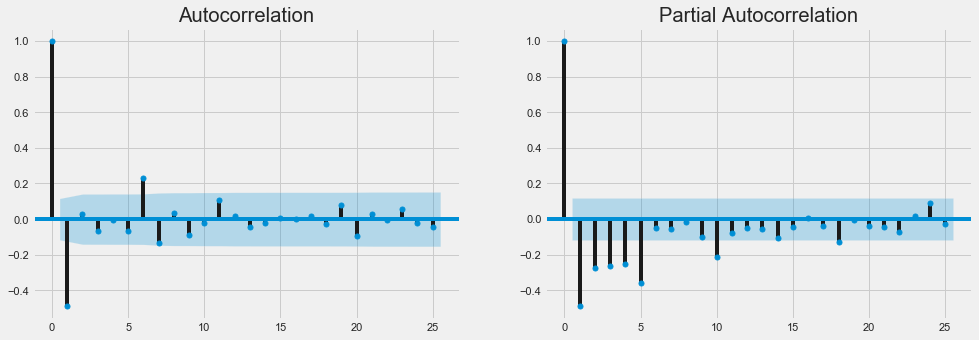

In [234]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series_date_10, ax=ax[0])
plot_pacf(series_date_10, ax=ax[1])
plt.show()

### Product #10 Daily: Train & Test Split

In [235]:
series_date_10=ds_daily_P10.Total_Sales_Amount
split_time = 228
time_d=np.arange(len(ds_daily_P10))
xtrain_d=series_date_10[:split_time]
xtest_d=series_date_10[split_time:]
timeTrain_d = time_d[:split_time]
timeTest_d = time_d[split_time:]

### Product #10 Daily: ARIMA Model

In [236]:
s_model = ARIMA(endog=xtrain_d , order=(1, 1, 0))
s_model_fit=s_model.fit()
print(s_model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Total_Sales_Amount   No. Observations:                  227
Model:                   ARIMA(1, 1, 0)   Log Likelihood               -1416.166
Method:                         css-mle   S.D. of innovations            123.850
Date:                  Mon, 04 Jan 2021   AIC                           2838.332
Time:                          04:42:21   BIC                           2848.607
Sample:                               1   HQIC                          2842.478
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.1811      5.528     -0.033      0.974     -11.015      10.653
ar.L1.D.Total_Sales_Amount    -0.4892      0.058     -8.473      0.

### Product #10 Daily: Daily Trend and Forecast

RMSE Train : 159.1113618973634
RMSE Test : 151.29898111648194


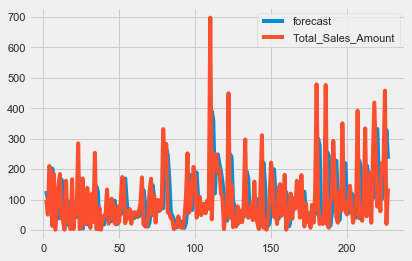

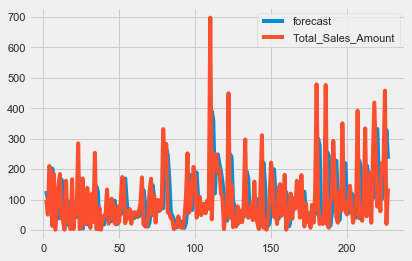

In [237]:
ytrain_pred = s_model_fit.predict()
ytest_pred = s_model_fit.predict(start=min(timeTest_d),end=max(timeTest_d),dynamic=True)

print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain_d)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest_d)**2)))
forecast = s_model_fit.forecast(20, alpha=0.05)
s_model_fit.plot_predict()

In [238]:
s_model_fit.forecast(20)[0]

array([ 79.79613028, 107.42861641,  93.64060371, 100.11633929,
        96.67863815,  98.09079135,  97.13029743,  97.33055061,
        96.96294276,  96.87314405,  96.64743547,  96.48821675,
        96.29646984,  96.12063639,  95.93701775,  95.75720778,
        95.57553453,  95.39477284,  95.2135652 ,  95.03257572])

Based on our daily forecast model we can see a slight up and downward trend on this product

## Conclusion 

There is also a lot of scope in EDA, which can be tried in future analysis.
Models which I have tried are not perfect and certainly there are room to improve the performance.
As we forecast further out into the future, it is natural for us to become less confident in our values.
This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

Also, based on forecasts models we suggest that to have enough inventories for Products#: 2, 4, 5, 8, and 10 since the trend for those products are upwards